In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import noisereduce as nr
from scipy.stats import norm
import scipy

In [ ]:
def NoiseReduceExtented(signal,samplerate,vis=False):
    S=np.zeros(np.shape(signal))
    minimum=np.Inf
    MSES=np.array([])
    inp=signal-S
    Signals=[]
    Stop=False
    counter=0
    while(Stop==False):
        denoise=nr.reduce_noise(y=inp, sr=samplerate)
        S=S+denoise #clean
        inp=signal-S #noise
        
        (mu, sigma) = norm.fit(inp)
        if vis==True:
            distr, bins, patches = plt.hist(inp, 300, facecolor='green',density =True,stacked =True)
            gaussian = scipy.stats.norm.pdf( bins, mu, sigma)
            plt.plot(bins, gaussian, 'r--', linewidth=2)
            plt.show()
        else:
            distr, bins= np.histogram(inp, 300,density =True)
            
        gaussian = scipy.stats.norm.pdf( bins, mu, sigma)
        MSE=np.mean((gaussian[:-1]-distr)**2)
        MSES=np.append(MSES,MSE)
        Signals.append(S)
        counter=counter+1
        if counter%10==0:
            p=np.where(MSES==np.min(MSES))[0][0]
            if minimum>np.min(MSES):
                Best_Signal=Signals[p]
                minimum=np.min(MSES)
                Signals=[]
                MSES=np.array([])
            else:
                Stop=True
        #Safety against while
        if counter>150:
            Stop=True
    return Best_Signal,counter

In [134]:
#Proposed Scheme
def NoiseReduceExtented(signal,samplerate,vis=False):
    S=np.zeros(np.shape(signal))
    minimum=np.Inf
    Errors=np.array([])
    inp=signal-S
    Signals=[]
    Stop=False
    counter=1
    while(Stop==False):
        denoise=nr.reduce_noise(y=inp, sr=samplerate)
        S=S+denoise #clean
        inp=signal-S #noise
        
        (mu, sigma) = norm.fit(inp)
    
        if vis==True:
            distr, bins, patches = plt.hist(inp, 300, facecolor='green',density =True,stacked =True)
            gaussian = scipy.stats.norm.pdf( bins, mu, sigma)
            plt.plot(bins, gaussian, 'r--', linewidth=2)
            plt.show()
        else:
            distr, bins= np.histogram(inp, 300,density =True)
            
        gaussian = scipy.stats.norm.pdf( bins, mu, sigma)

        MSE=np.mean((gaussian[:-1]-distr)**2)
        
        
        if counter>=20:
            #first distributions are bad
            Errors=np.append(Errors,MSE)
            Signals.append(S)
        
    
        if counter%40==0 :
            p=np.where(Errors==np.min(Errors))[0][0]
            if minimum>np.min(Errors):
                Best_Signal=Signals[p]
                minimum=np.min(Errors)
                Signals=[]
                Errors=np.array([])
                
            elif np.all((np.diff(Errors))>0):
                Best_Signal=Signals[-1]
                Signals=[]
                Errors=np.array([])
            else:
                Stop=True
                
        #Safety        
        if counter>150:
            Stop=True
        counter=counter+1

    return Best_Signal,counter

In [ ]:
#Improved Spectral Gating
for i in range(1,3000):
    
    for j in ['Patra','Nikaia']:
        try:
            sr, mixtureR = wavfile.read('/home/myron/Desktop/Diplomatikh/data/F_Covid19/'+j+'_LR_st/'+str(i)+'_R_scaled')
            sr, mixtureL = wavfile.read('/home/myron/Desktop/Diplomatikh/data/F_Covid19/'+j+'_LR_st/'+str(i)+'_L_scaled')
            s_R,_=NoiseReduceExtented(mixtureR,sr)
            s_L,_=NoiseReduceExtented(mixtureL,sr)
            
            wavfile.write(str(i)+'_R_denoised', sr, s_R)
            wavfile.write(str(i)+'_L_denoised', sr, s_L)
        except:
            continue

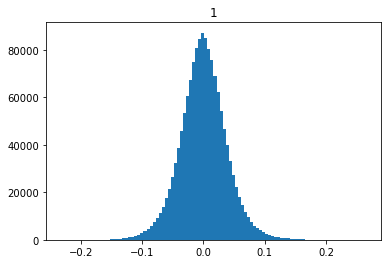

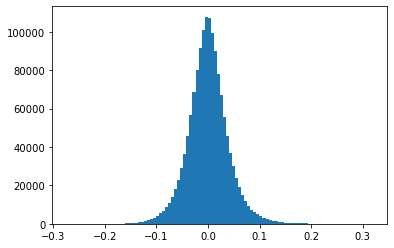

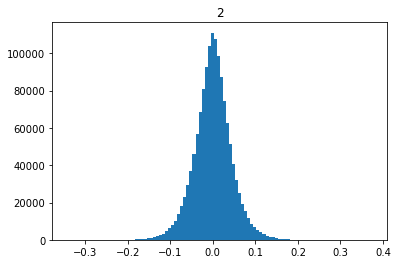

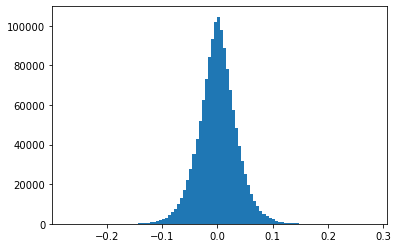

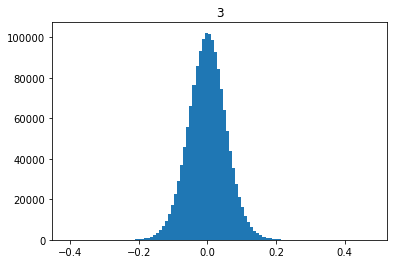

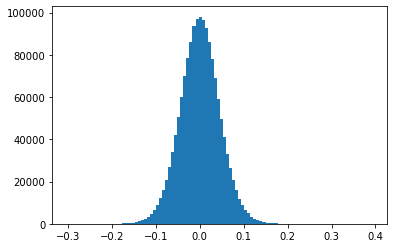

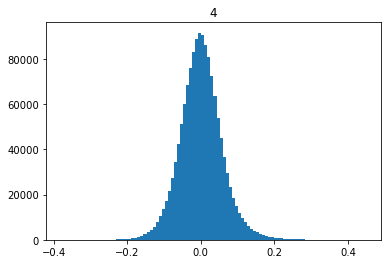

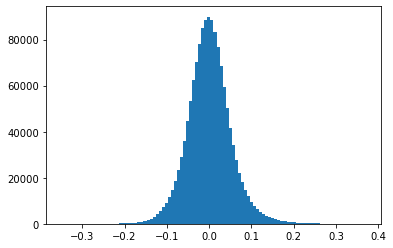

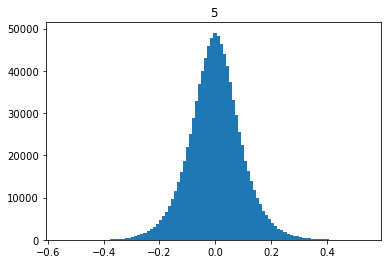

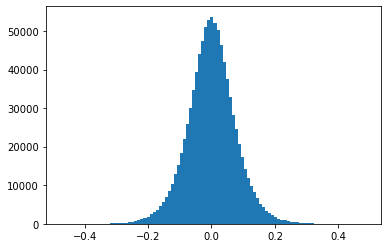

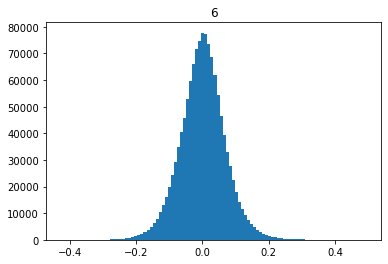

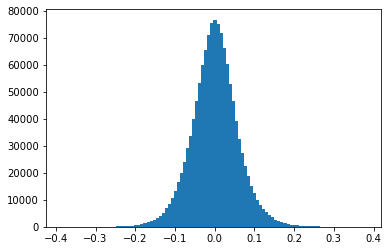

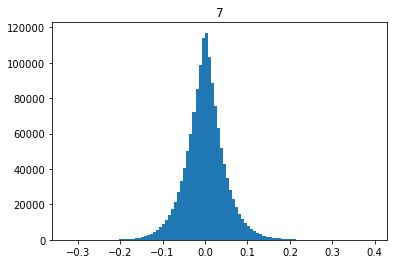

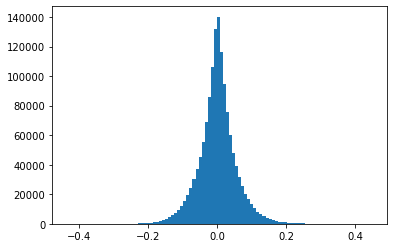

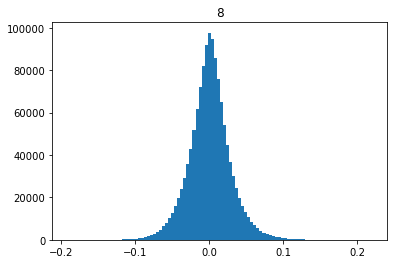

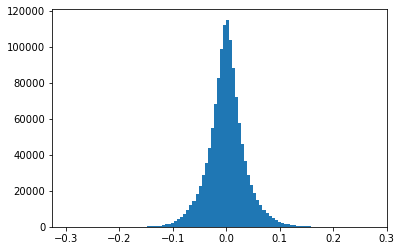

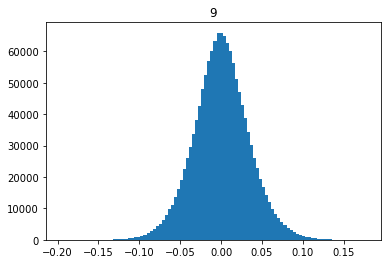

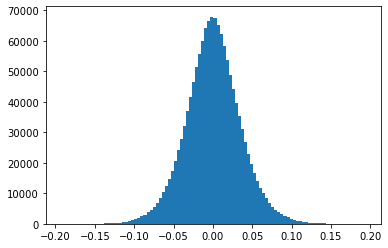

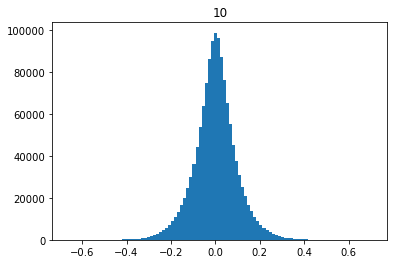

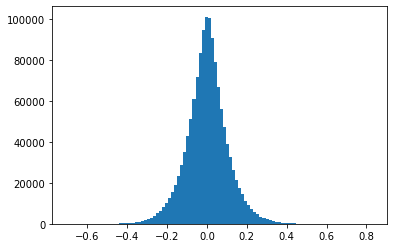

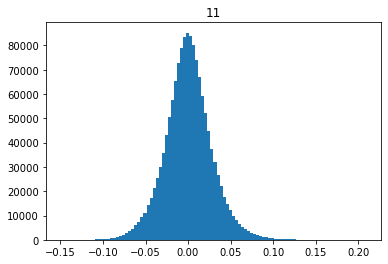

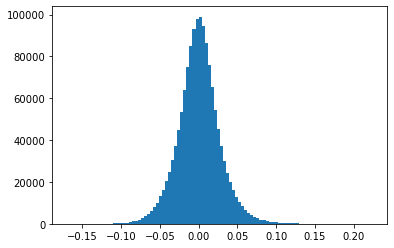

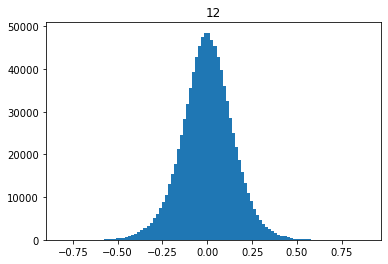

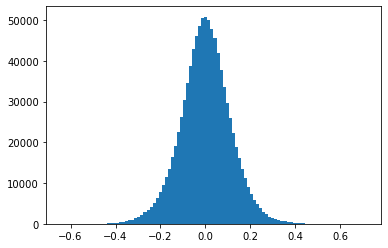

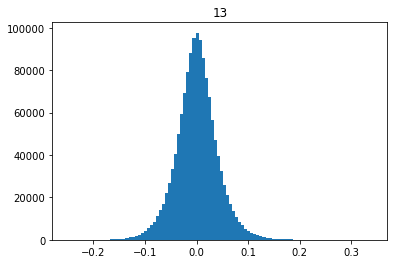

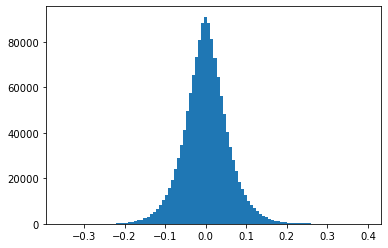

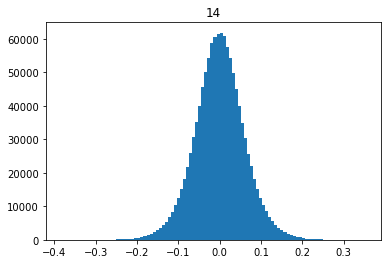

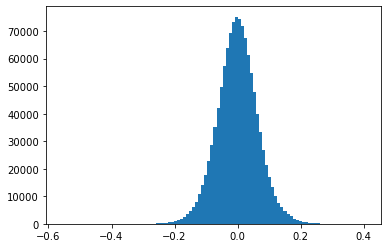

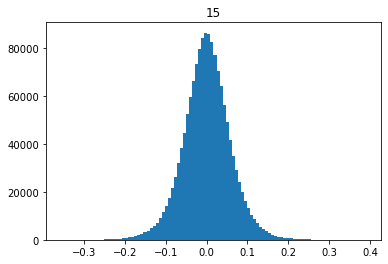

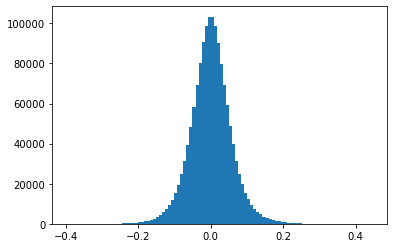

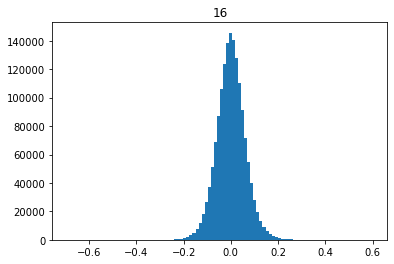

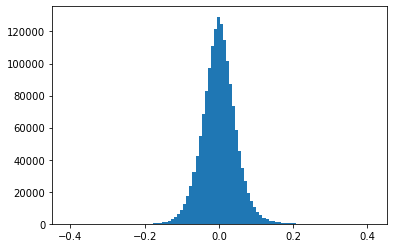

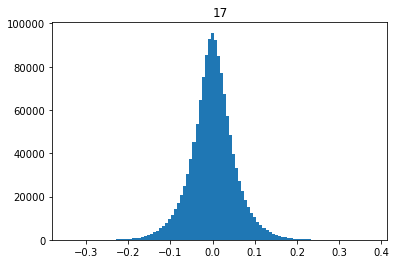

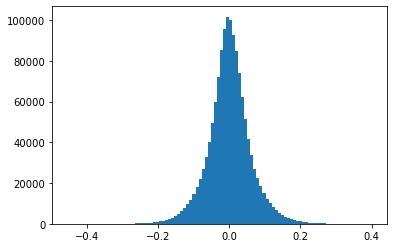

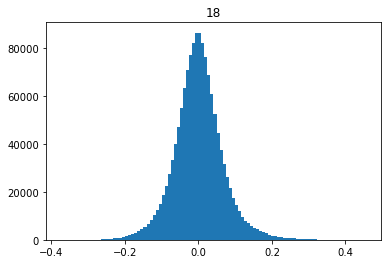

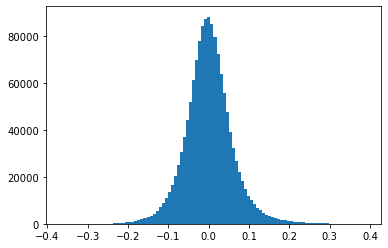

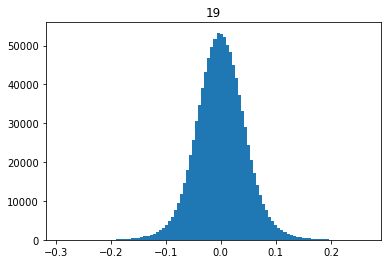

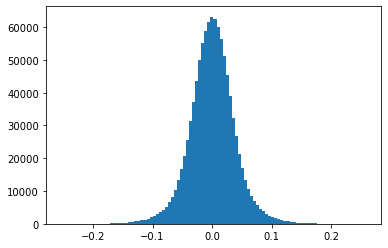

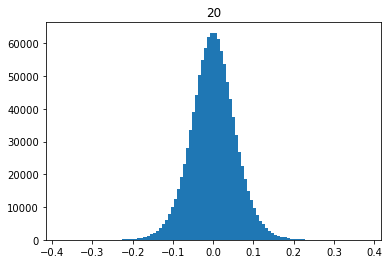

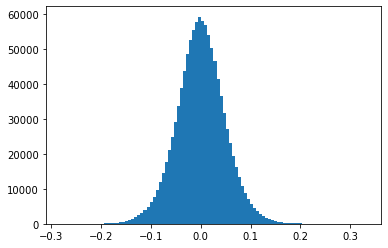

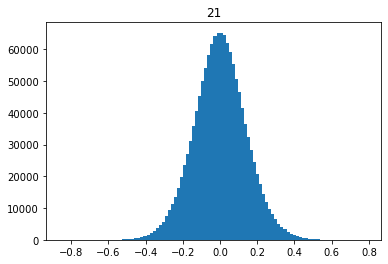

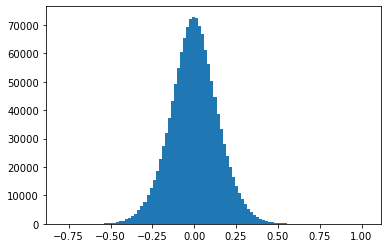

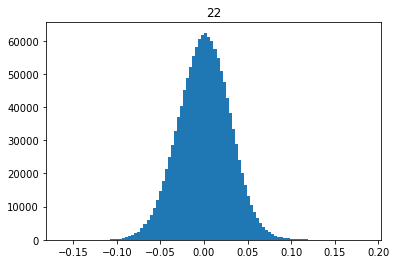

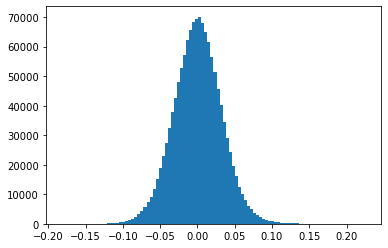

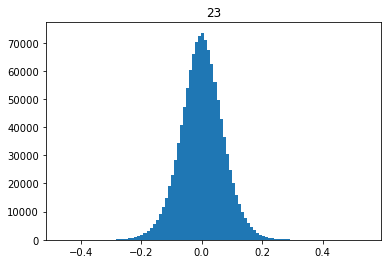

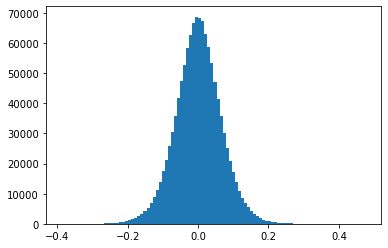

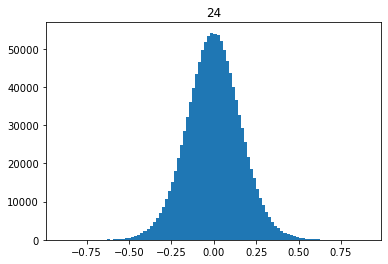

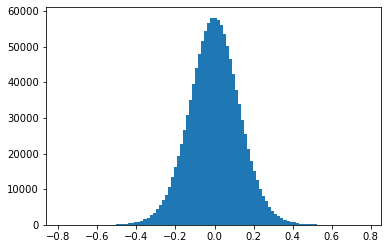

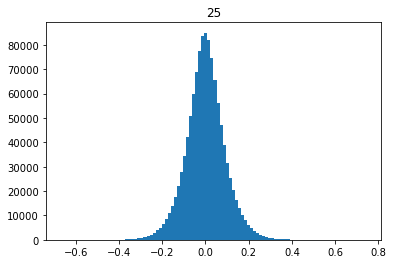

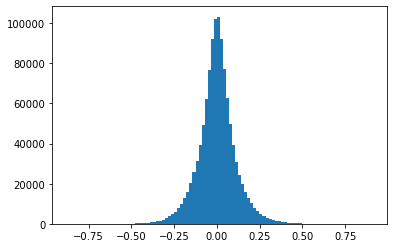

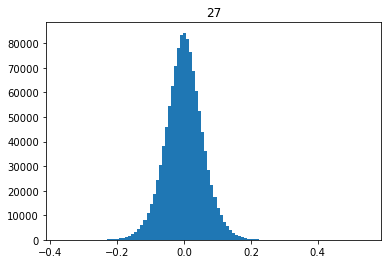

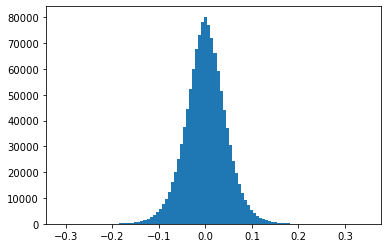

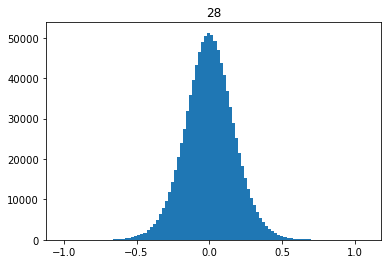

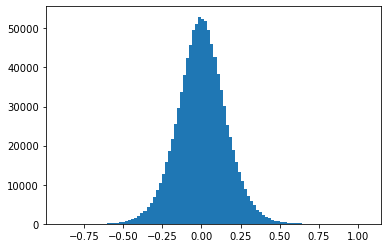

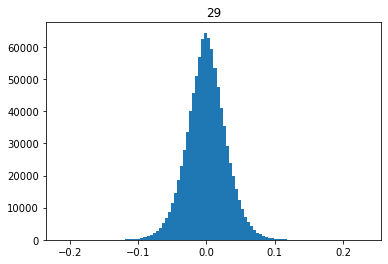

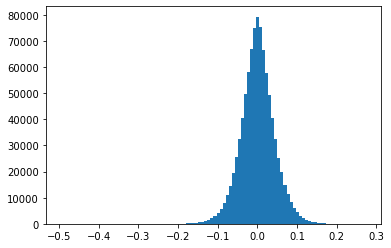

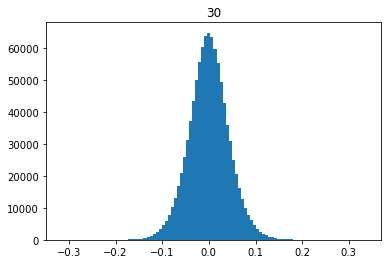

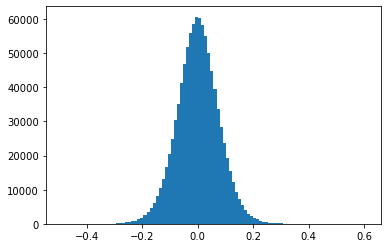

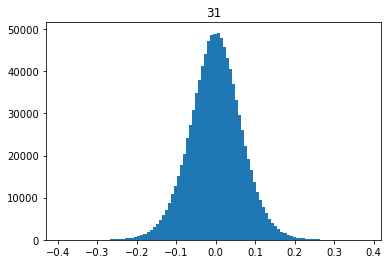

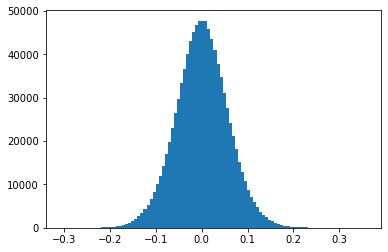

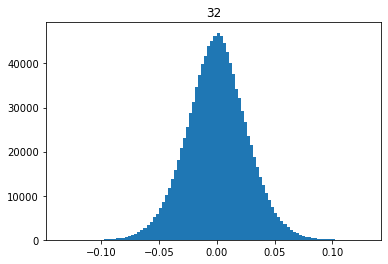

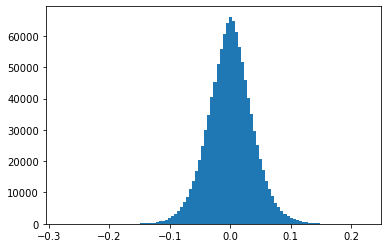

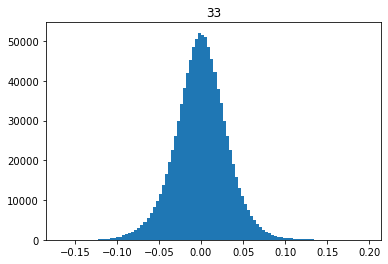

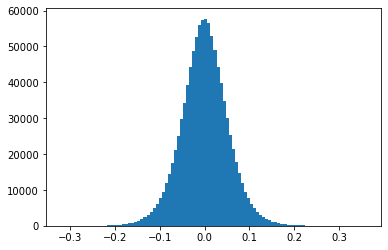

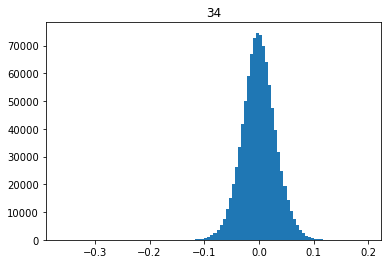

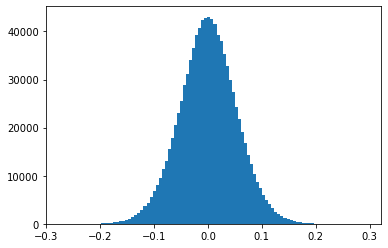

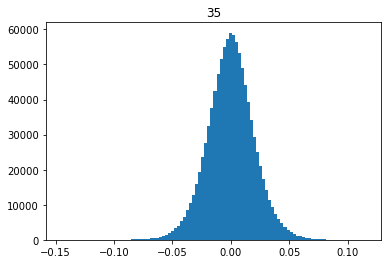

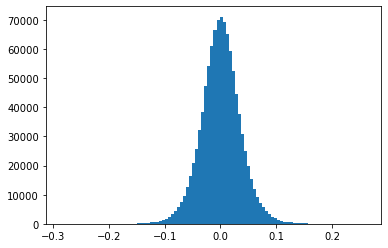

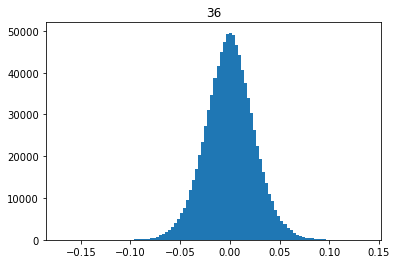

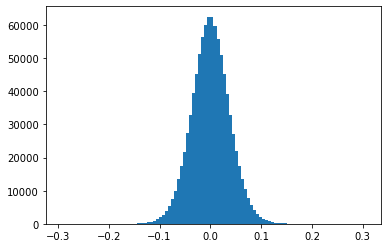

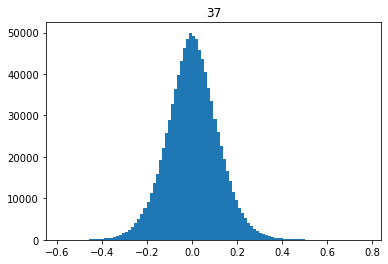

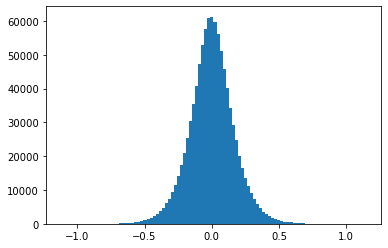

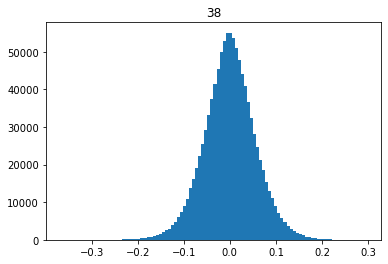

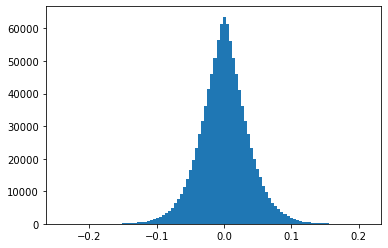

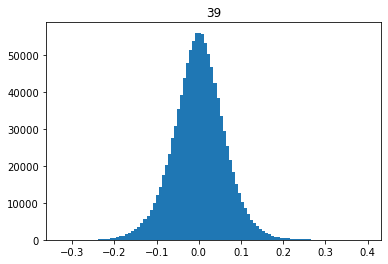

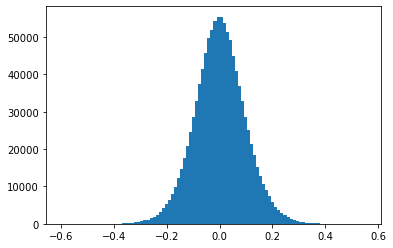

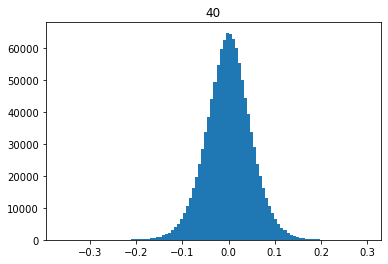

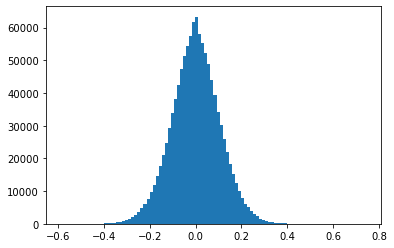

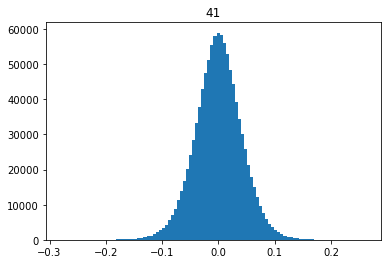

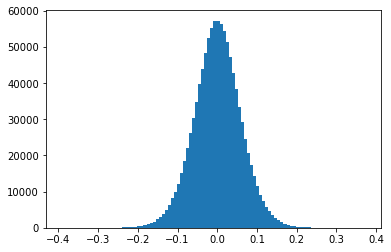

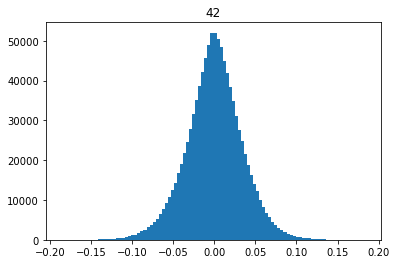

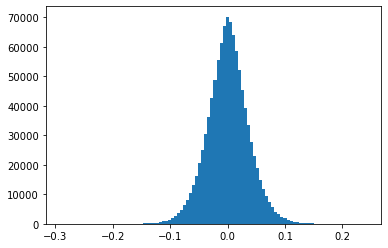

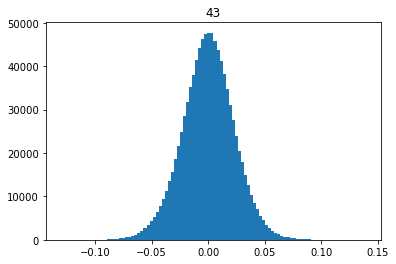

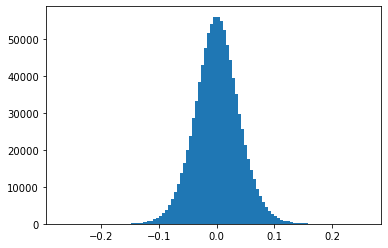

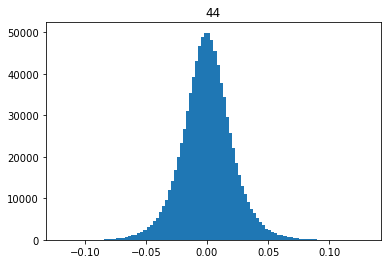

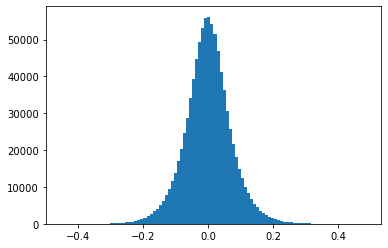

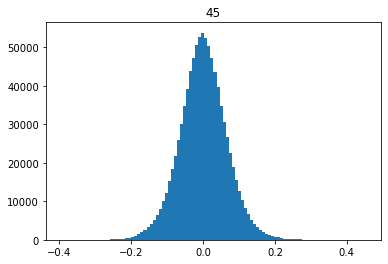

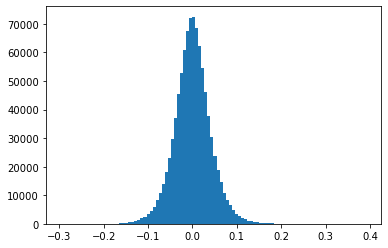

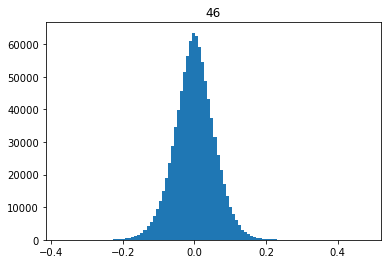

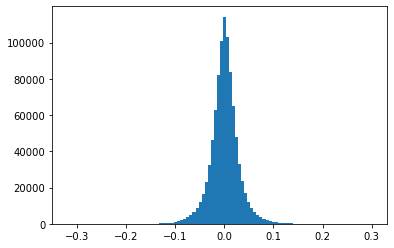

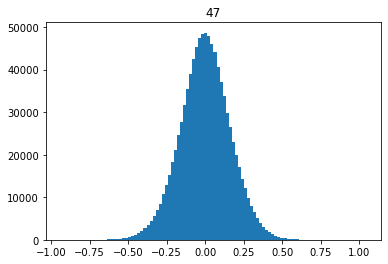

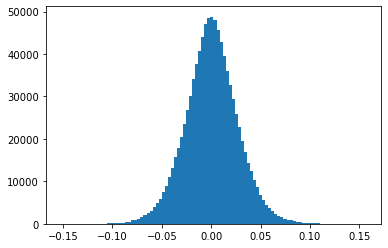

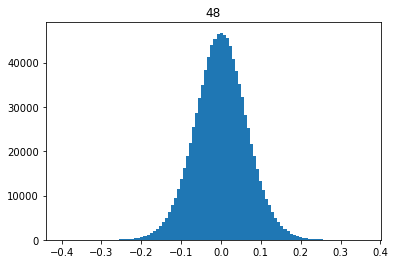

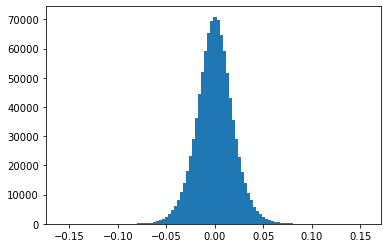

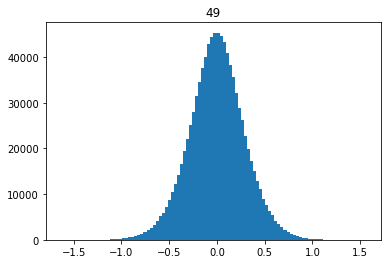

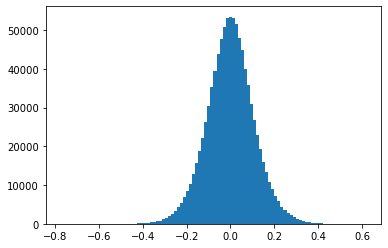

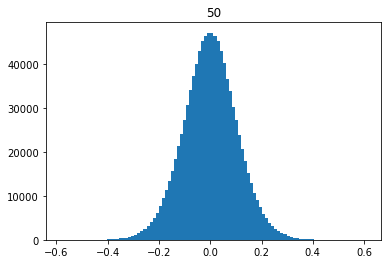

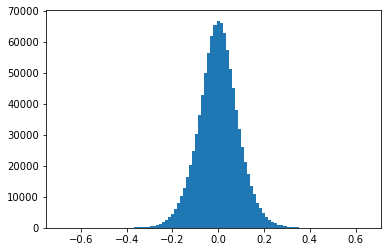

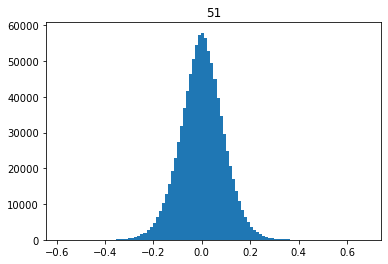

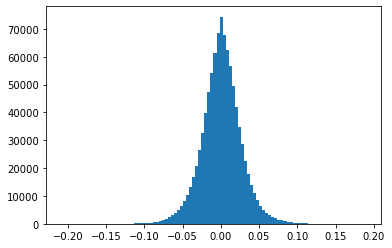

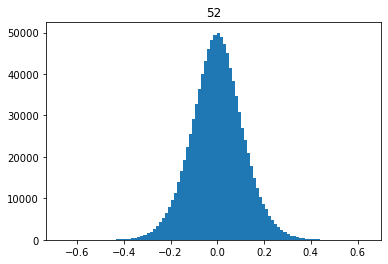

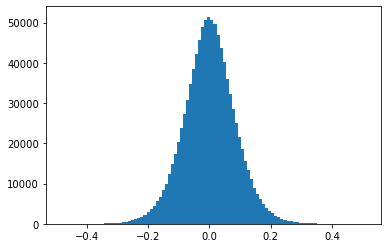

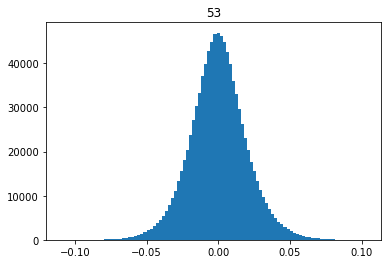

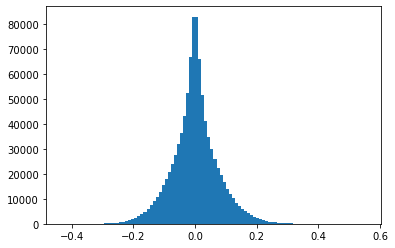

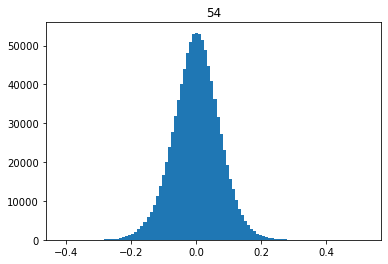

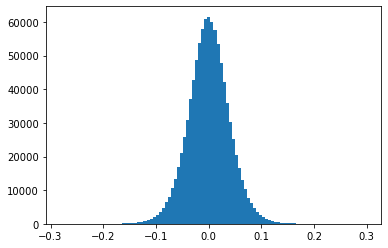

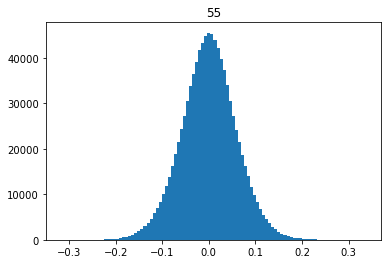

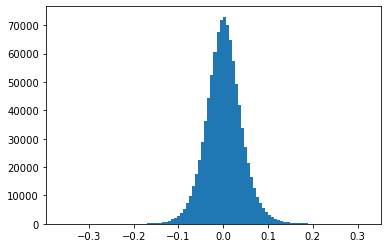

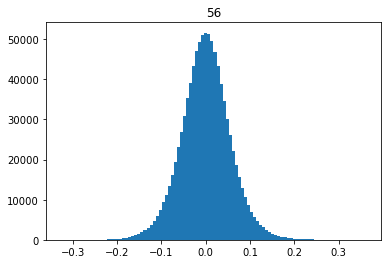

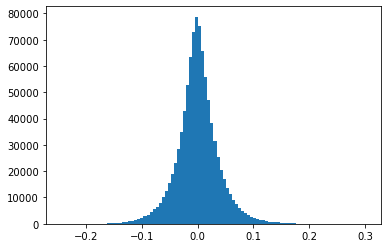

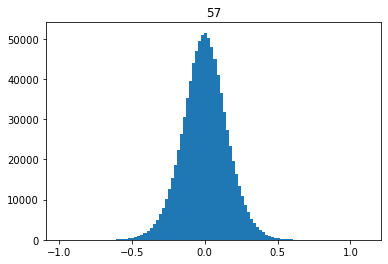

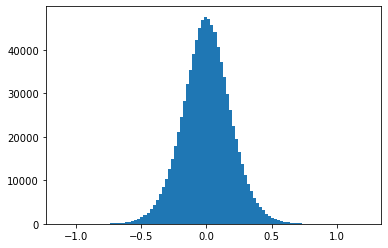

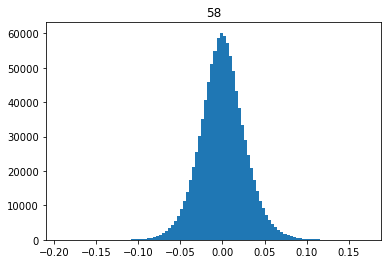

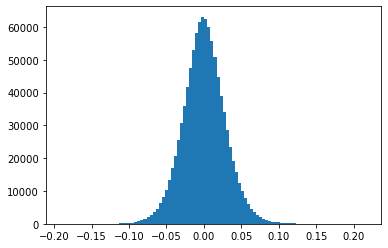

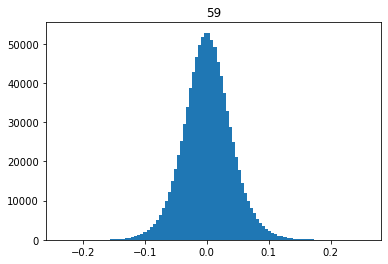

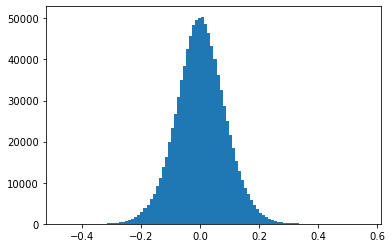

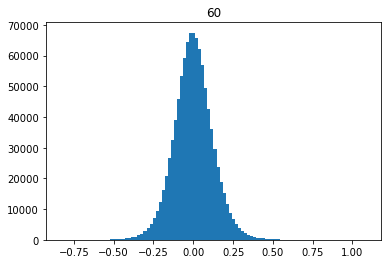

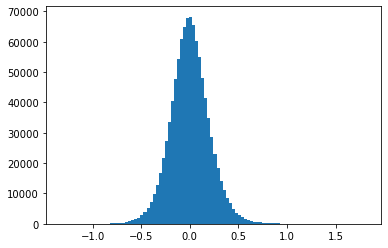

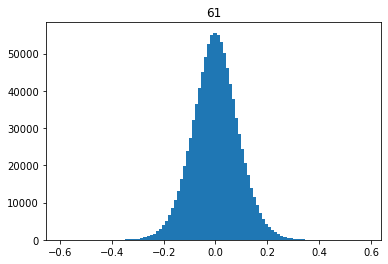

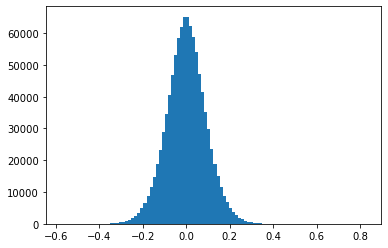

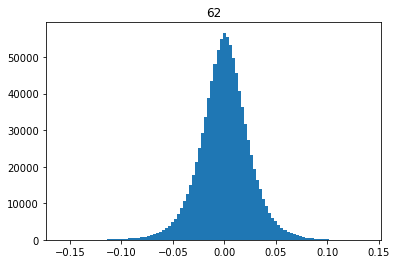

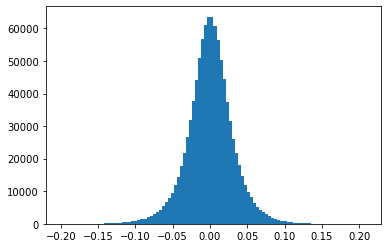

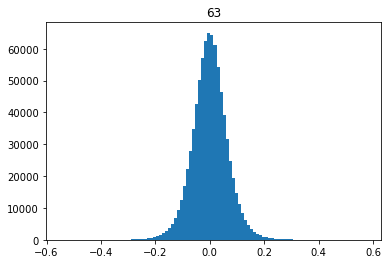

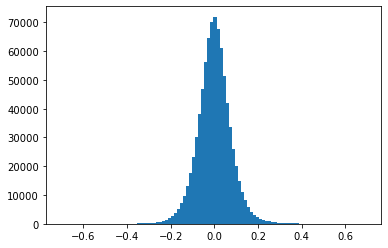

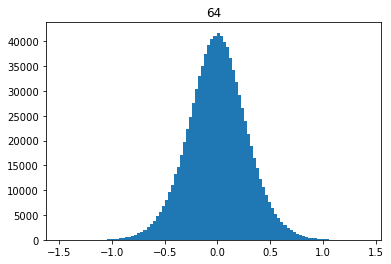

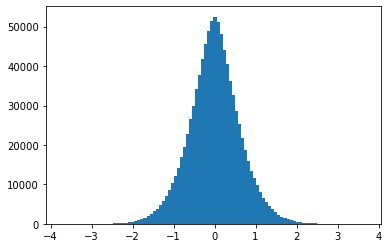

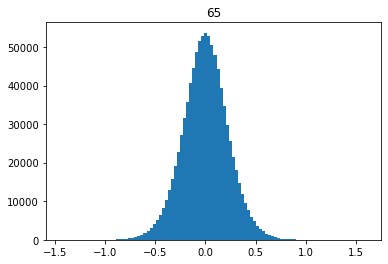

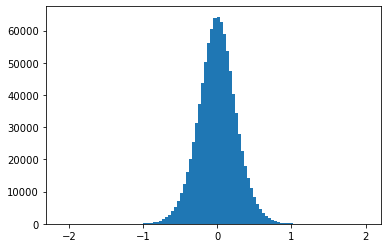

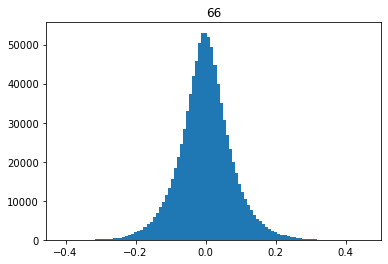

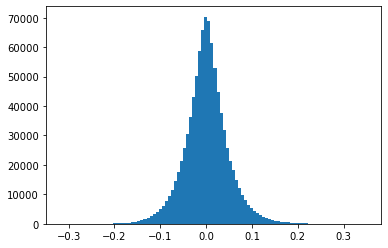

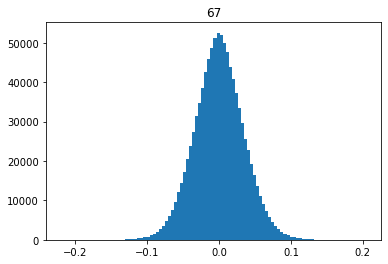

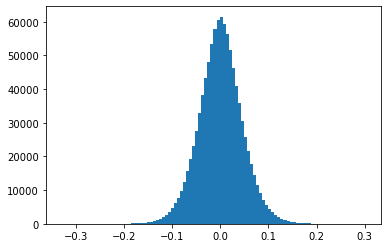

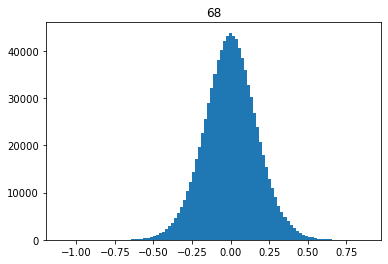

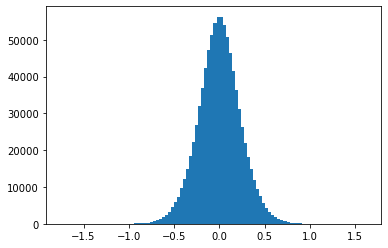

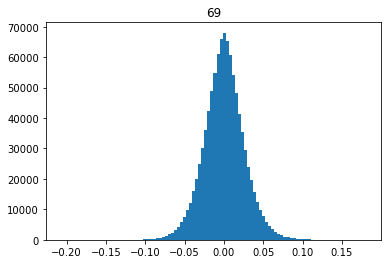

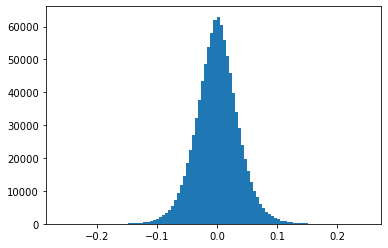

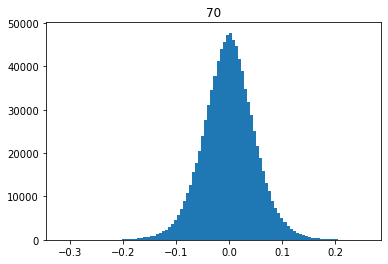

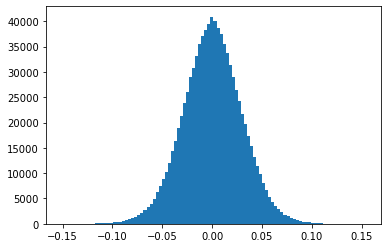

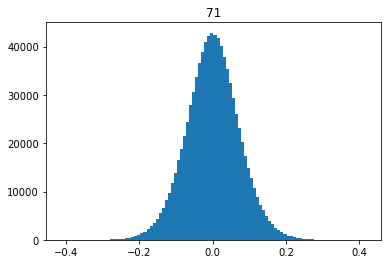

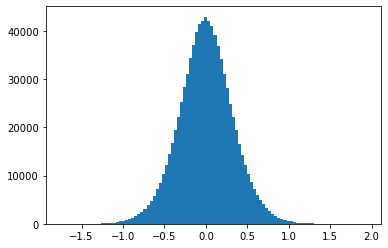

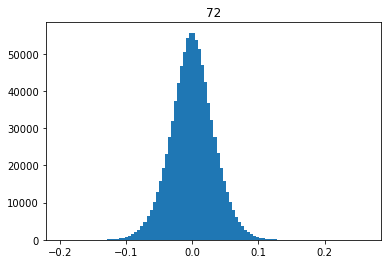

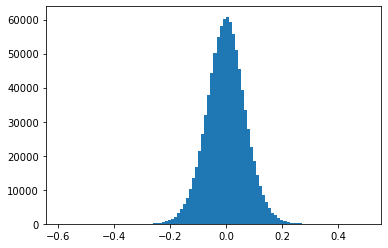

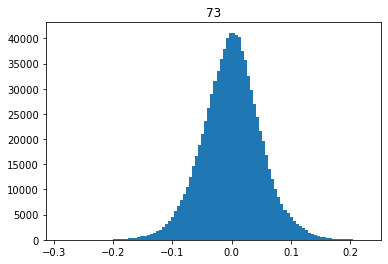

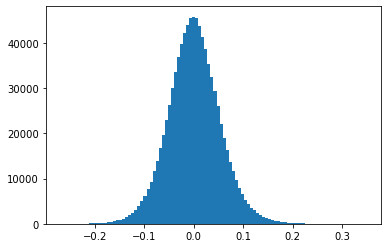

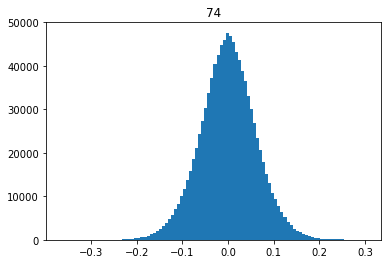

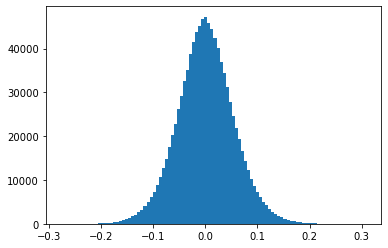

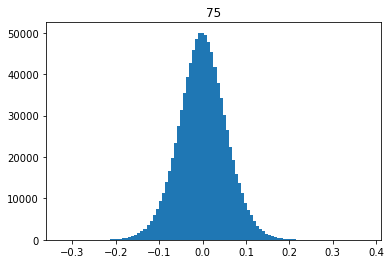

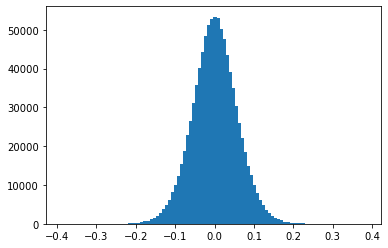

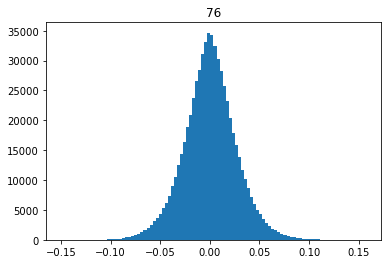

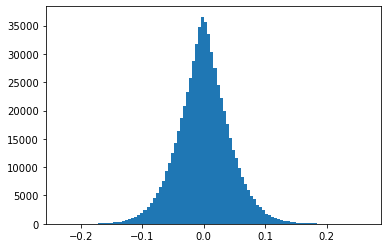

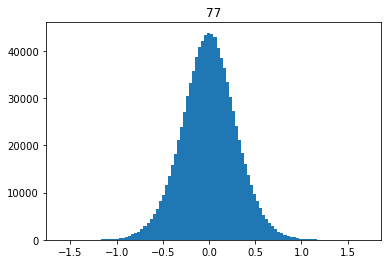

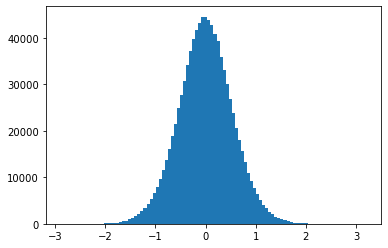

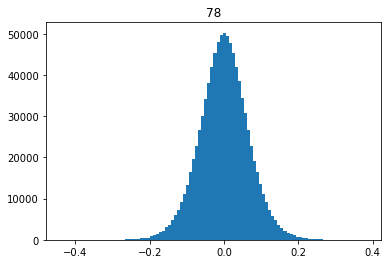

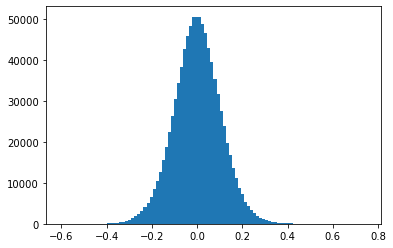

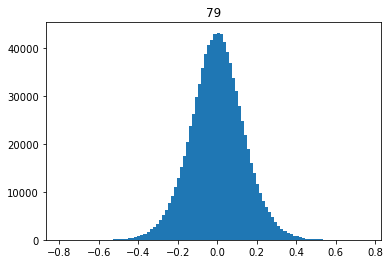

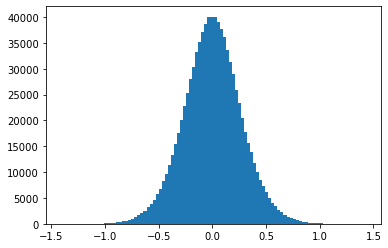

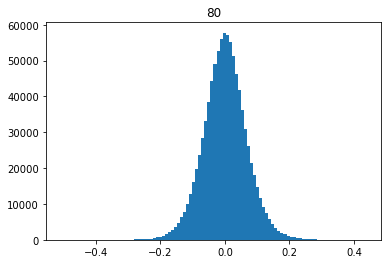

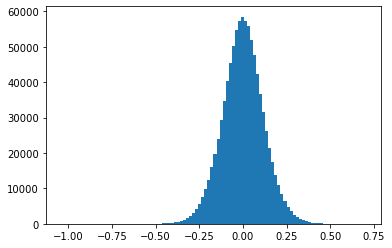

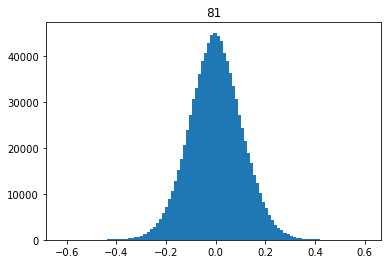

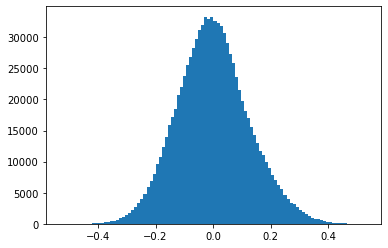

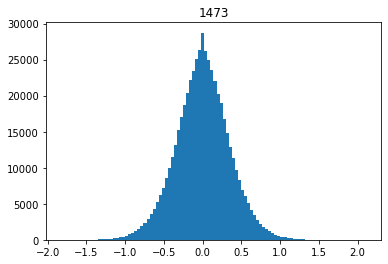

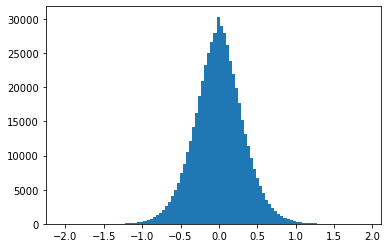

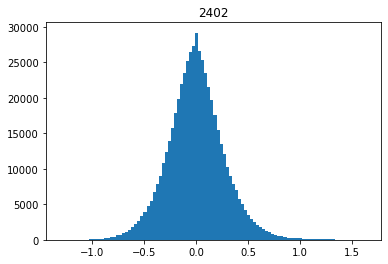

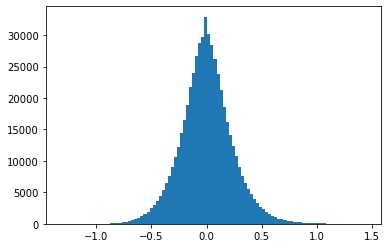

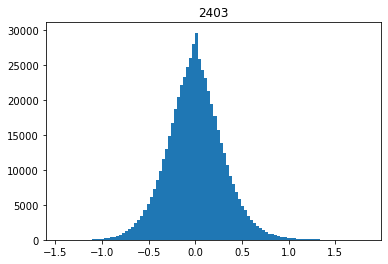

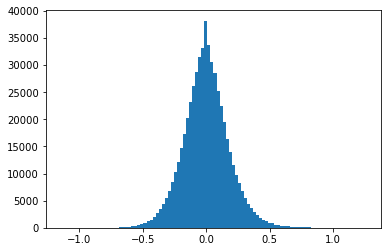

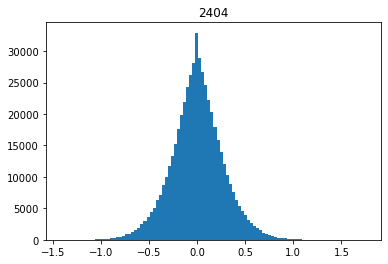

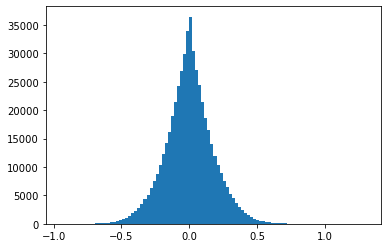

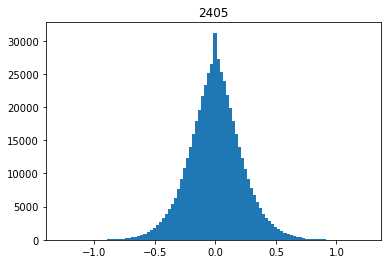

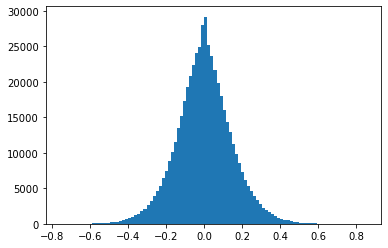

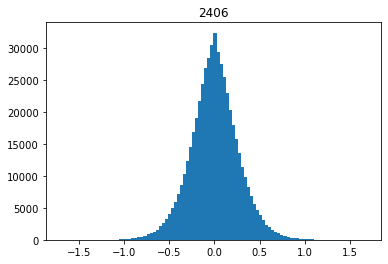

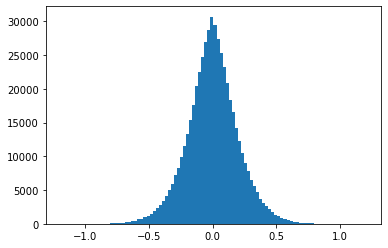

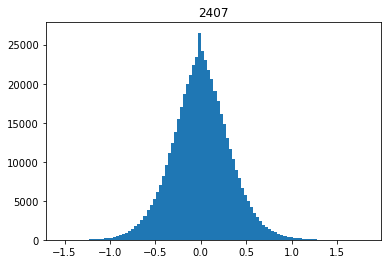

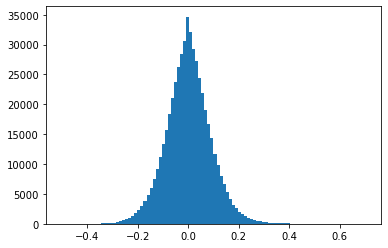

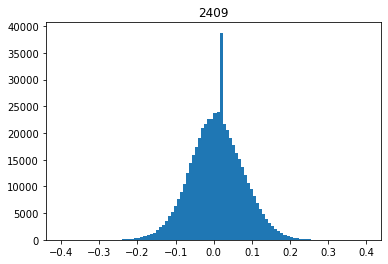

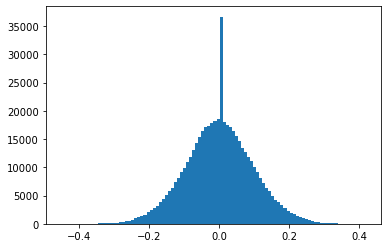

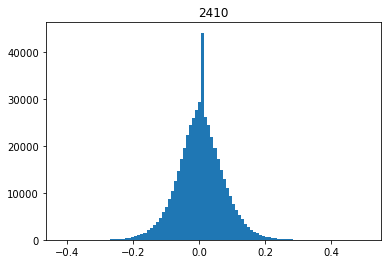

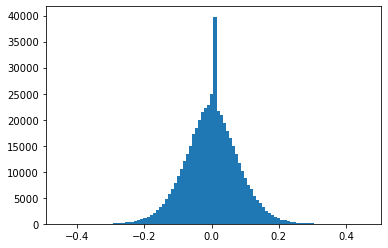

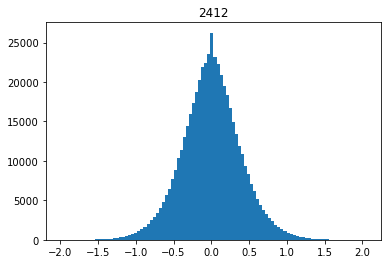

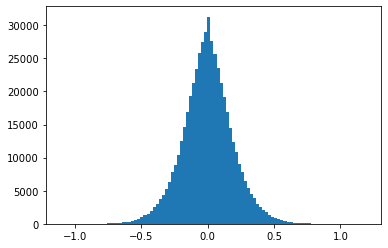

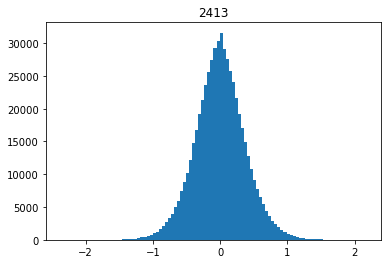

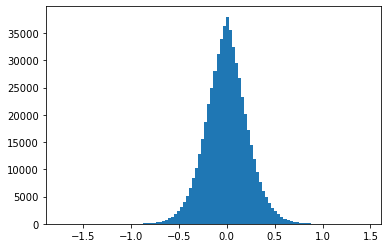

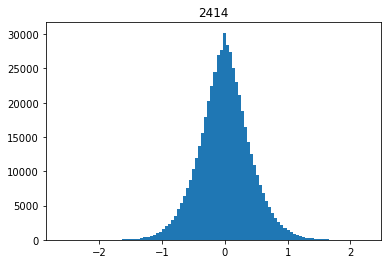

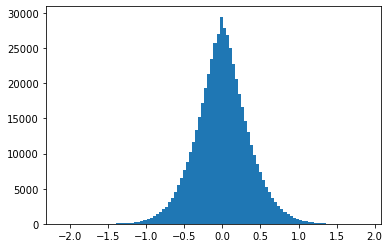

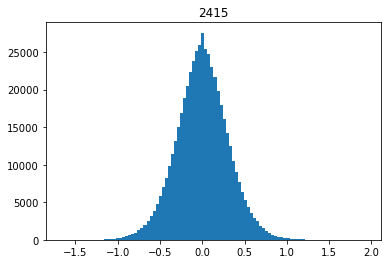

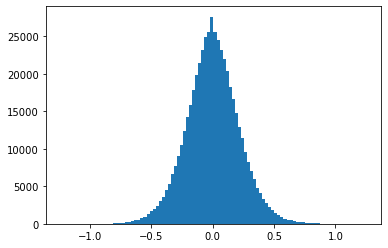

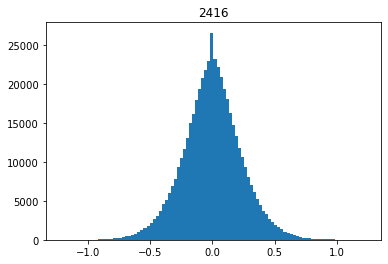

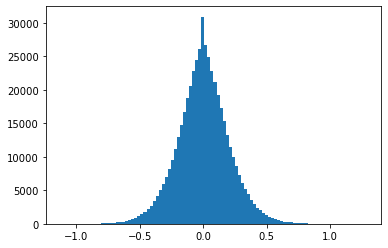

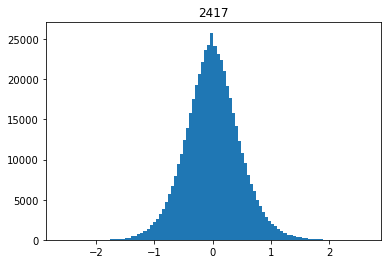

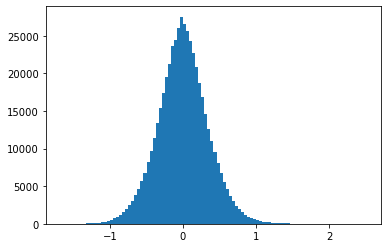

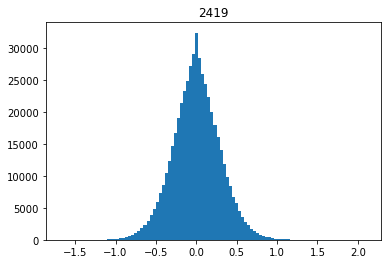

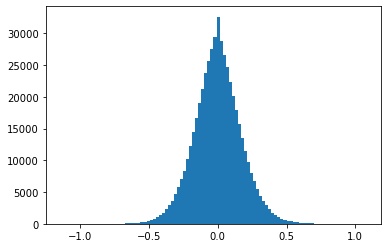

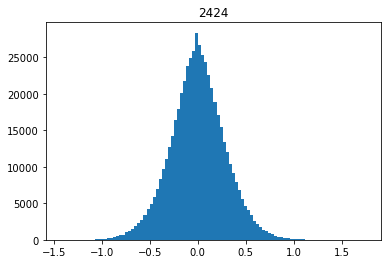

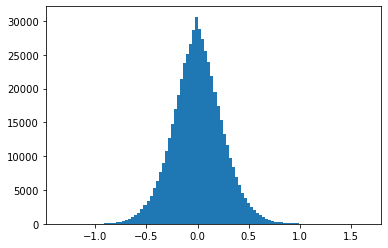

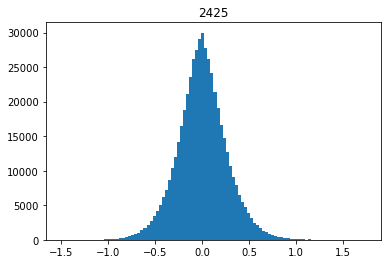

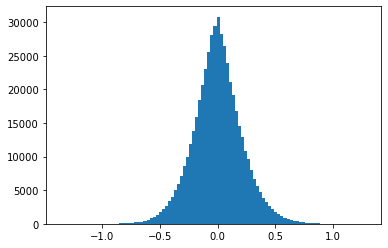

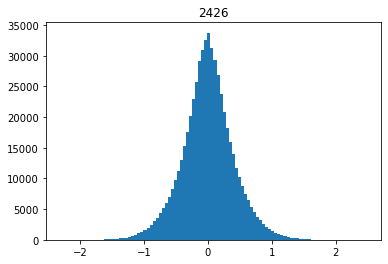

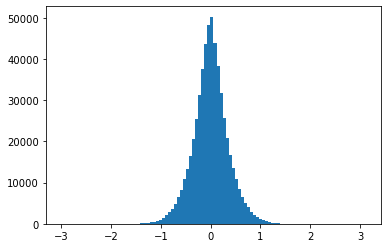

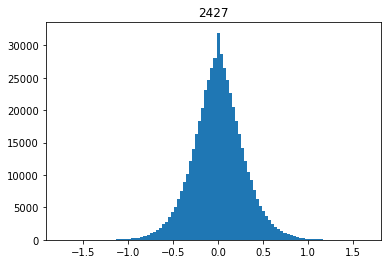

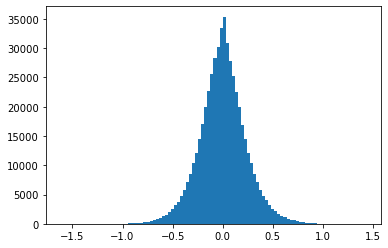

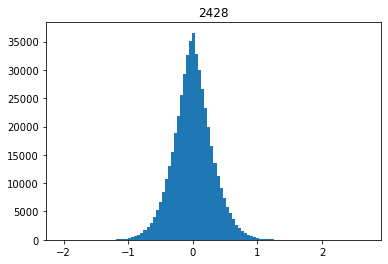

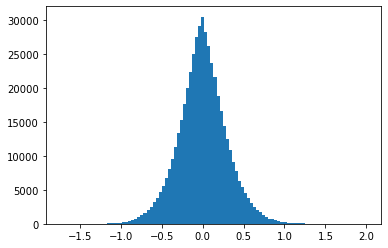

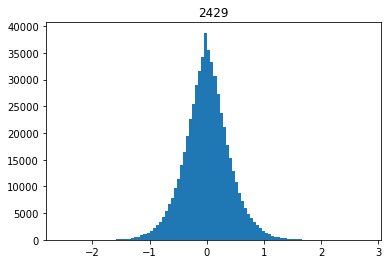

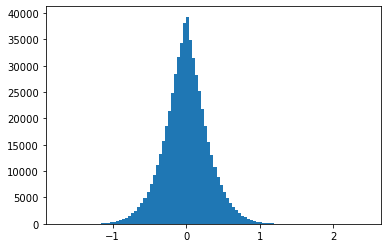

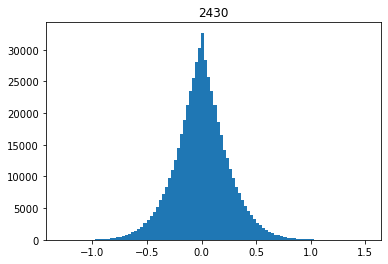

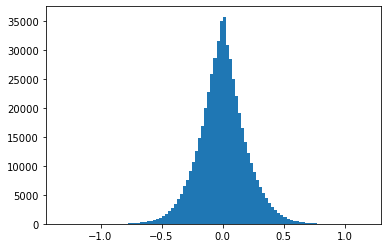

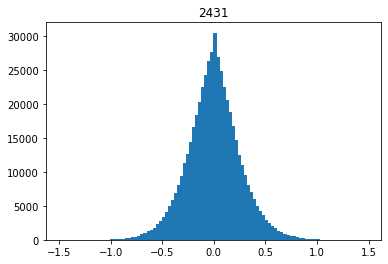

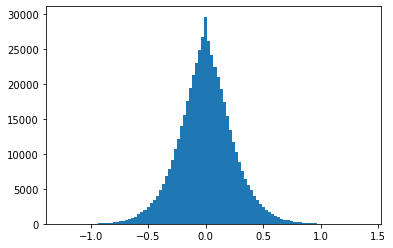

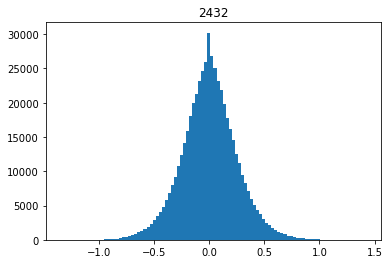

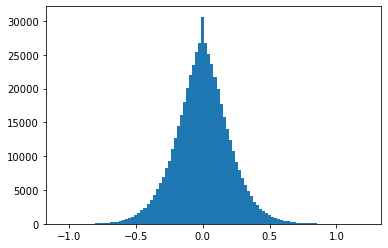

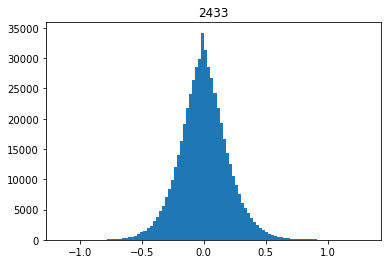

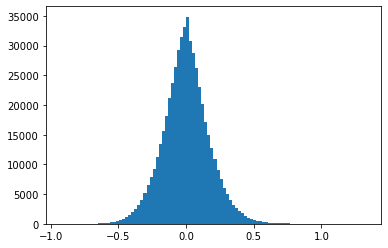

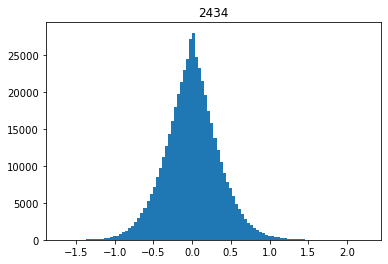

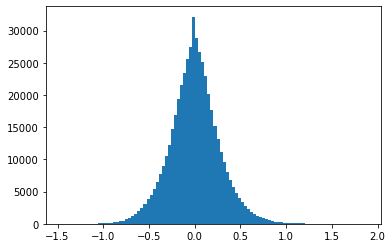

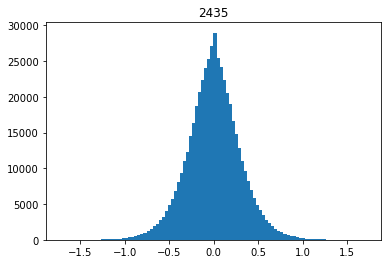

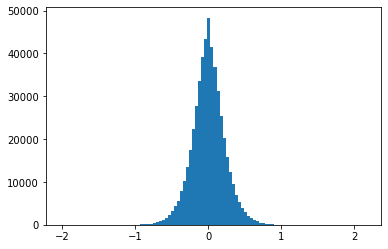

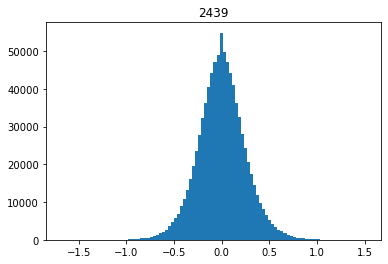

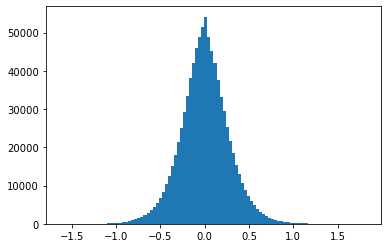

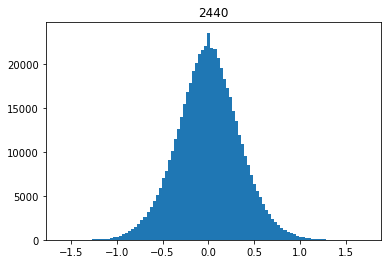

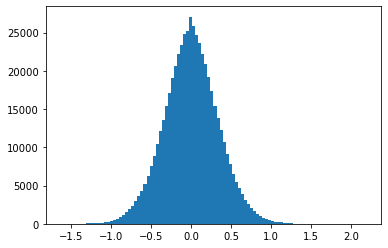

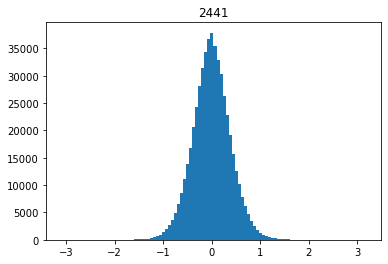

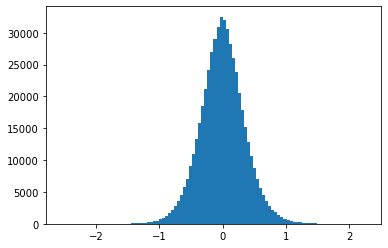

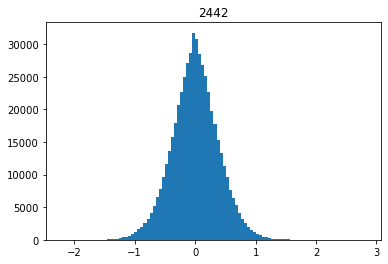

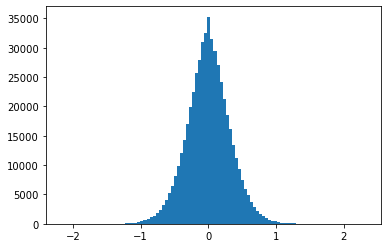

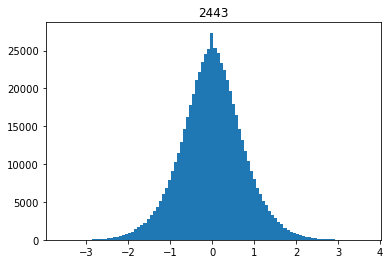

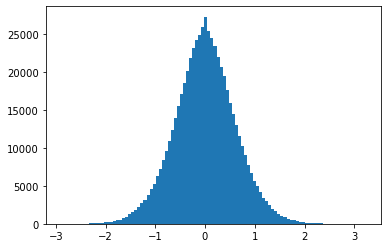

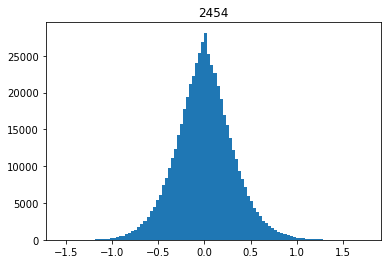

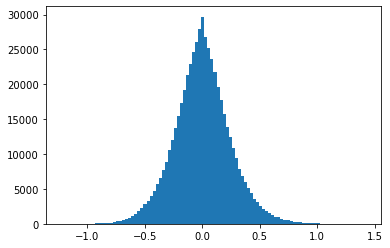

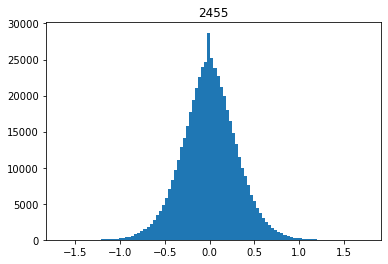

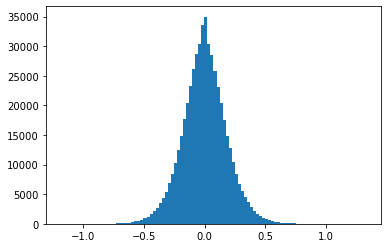

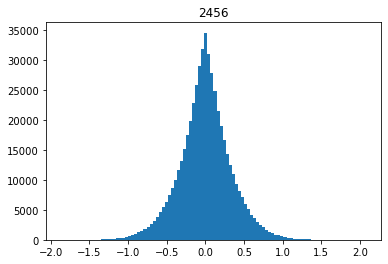

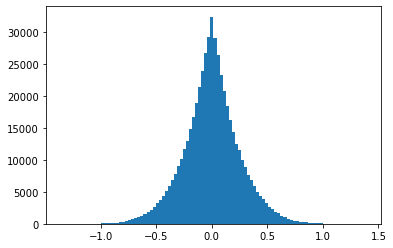

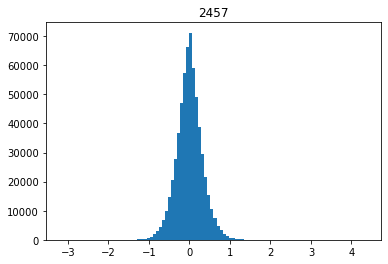

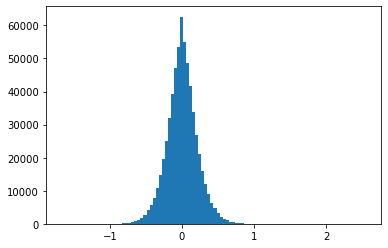

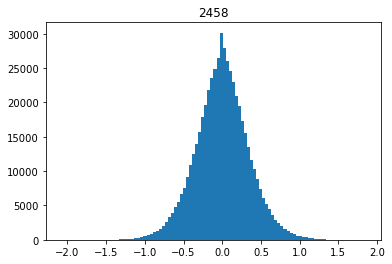

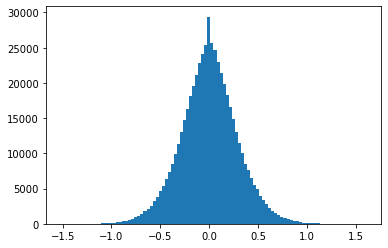

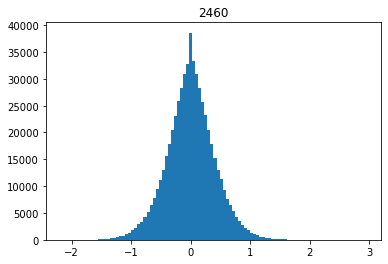

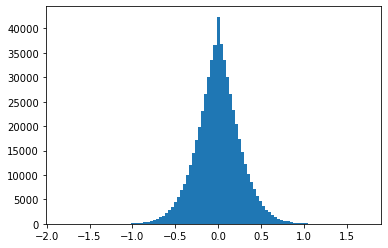

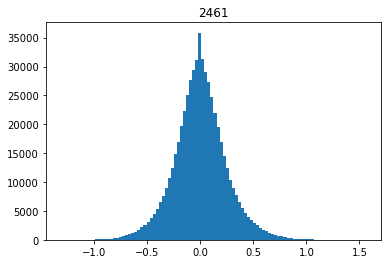

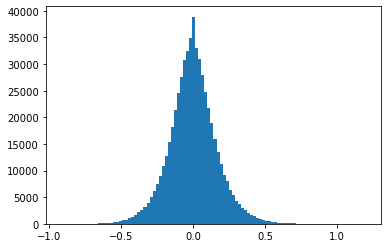

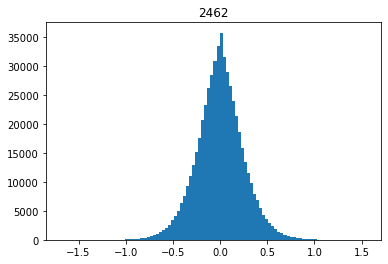

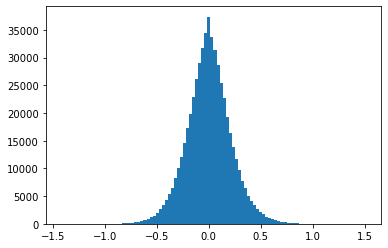

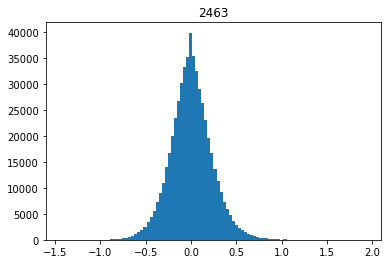

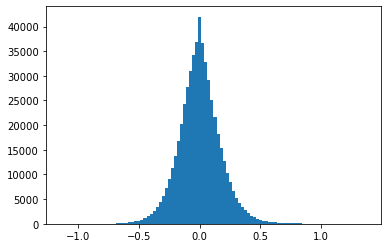

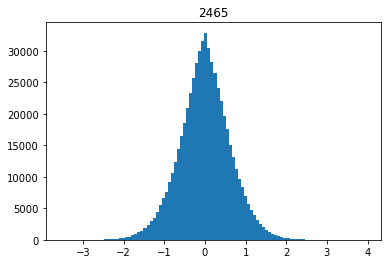

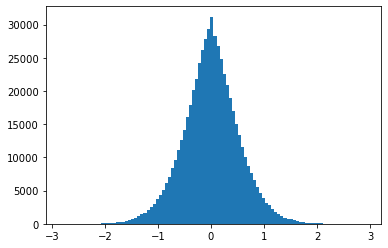

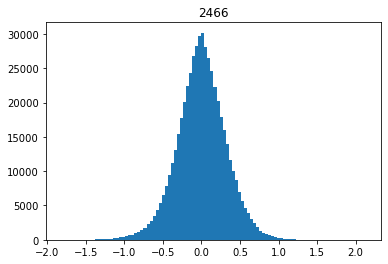

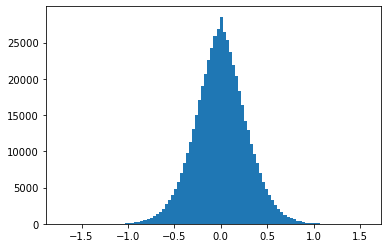

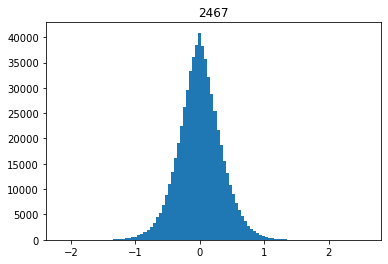

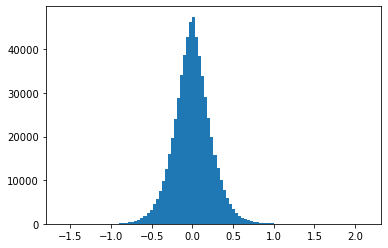

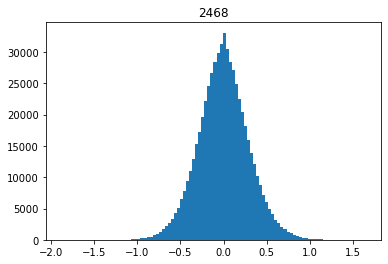

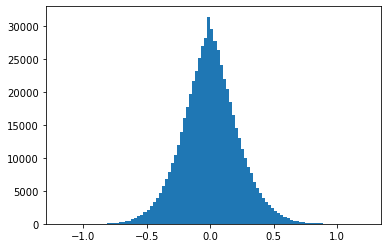

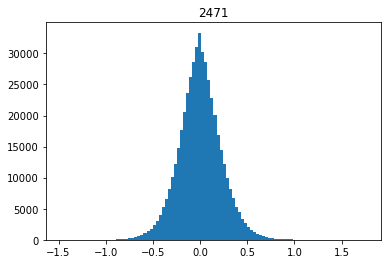

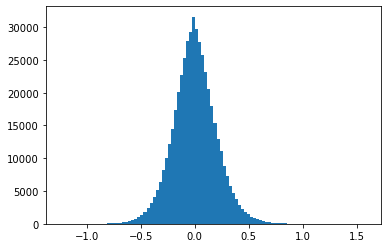

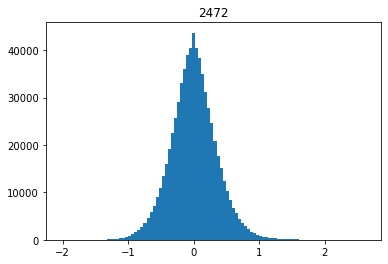

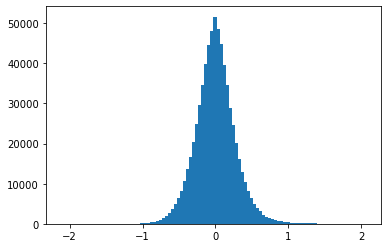

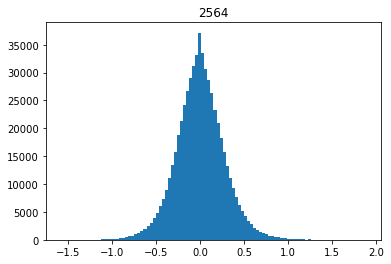

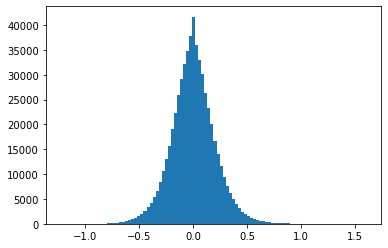

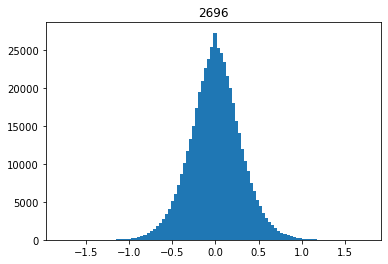

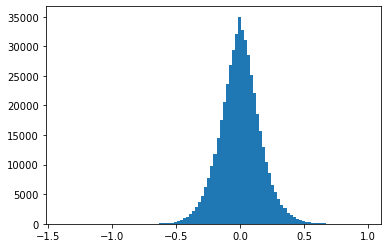

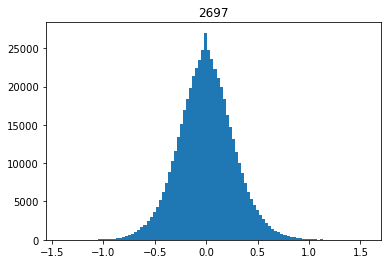

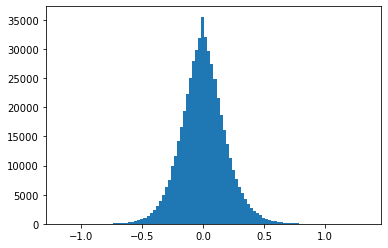

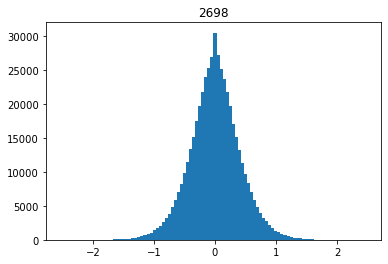

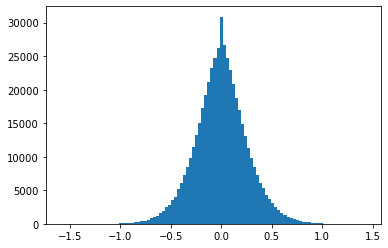

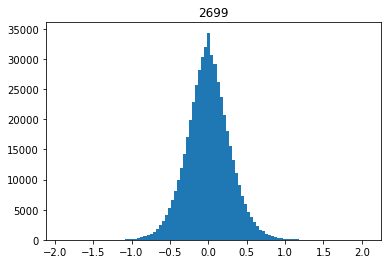

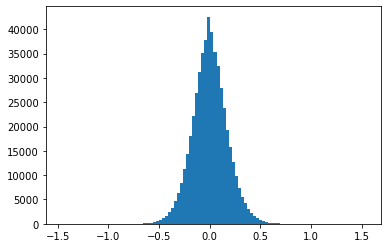

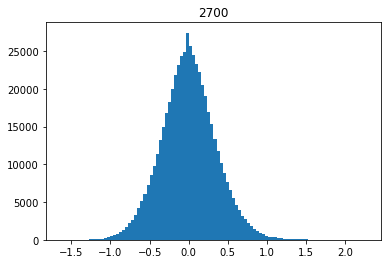

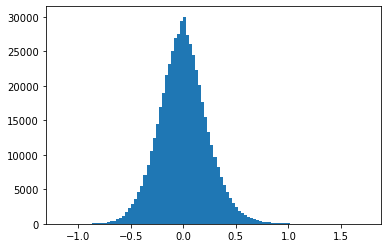

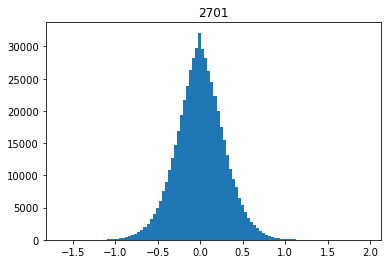

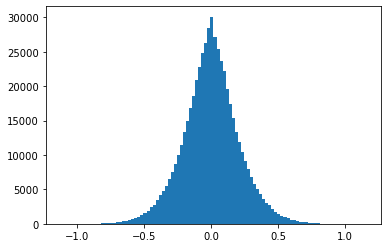

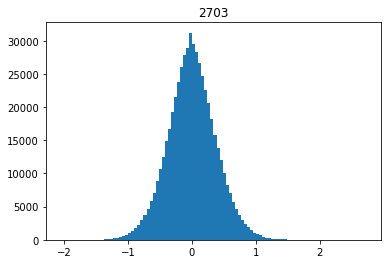

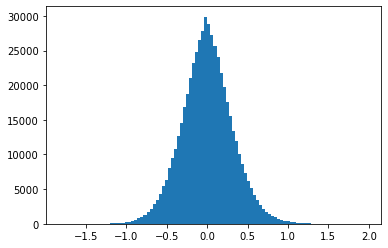

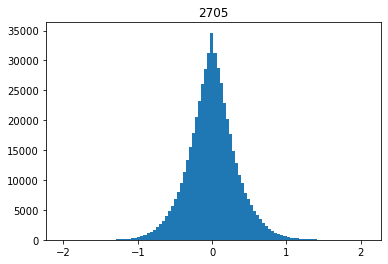

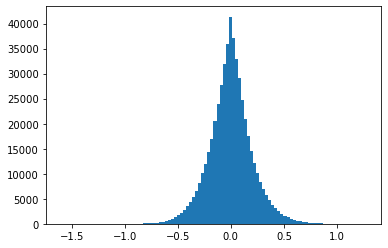

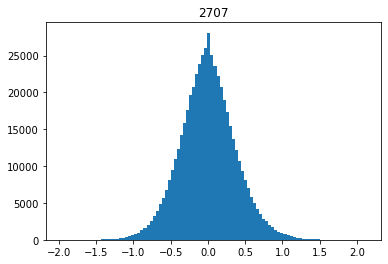

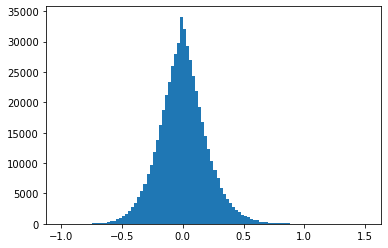

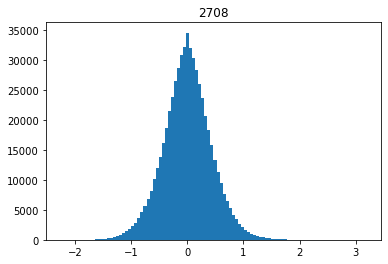

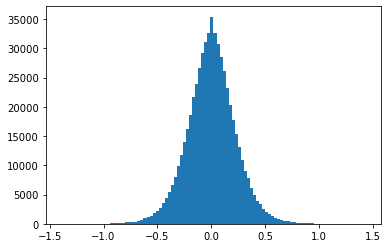

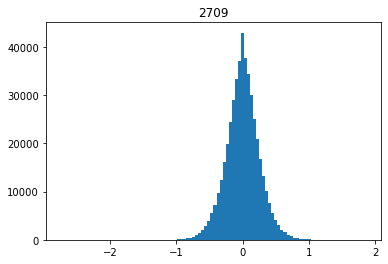

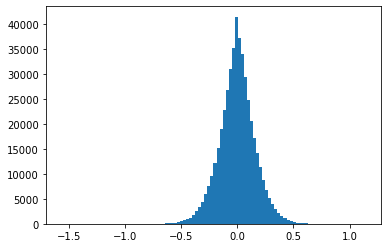

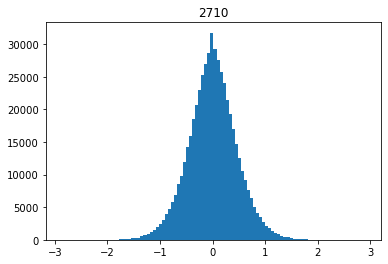

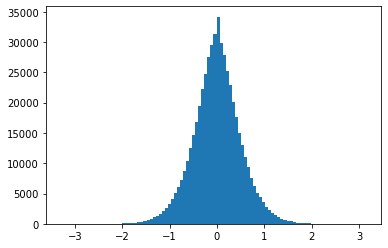

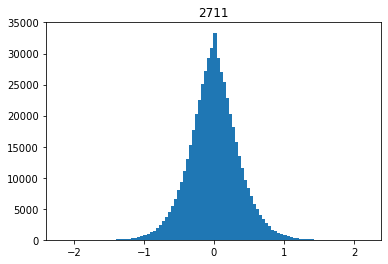

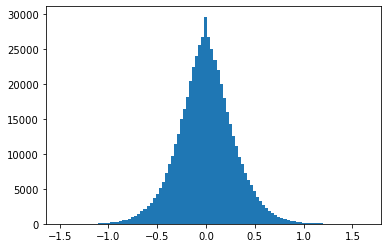

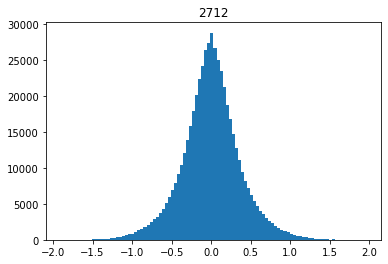

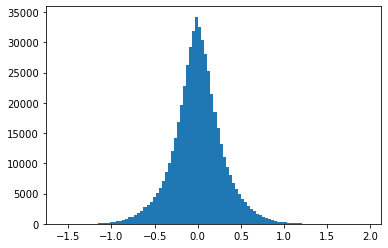

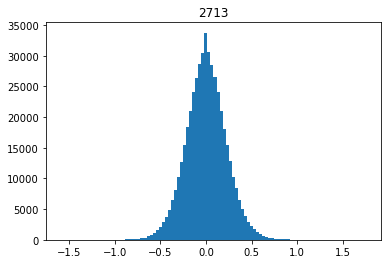

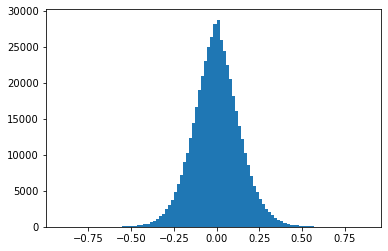

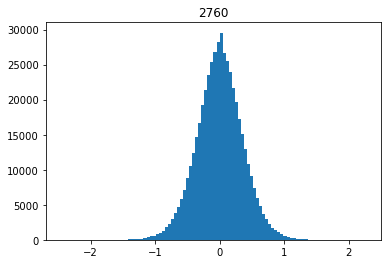

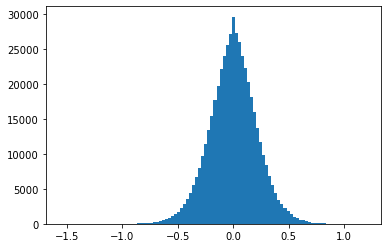

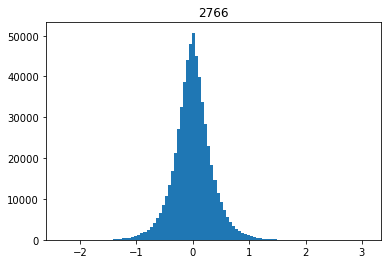

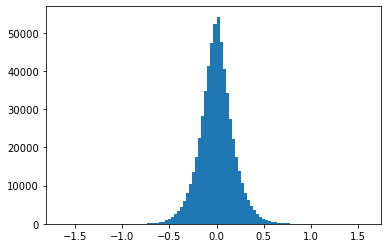

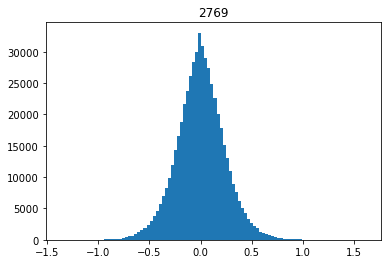

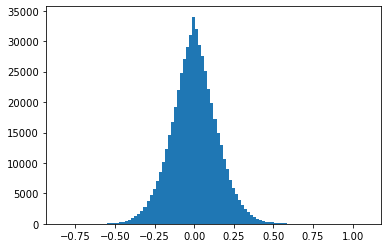

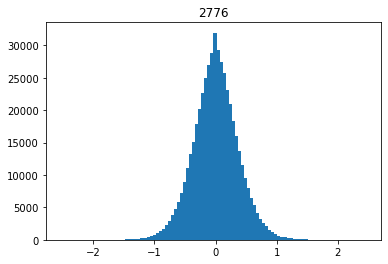

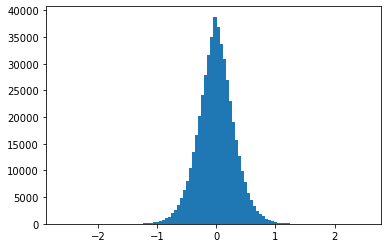

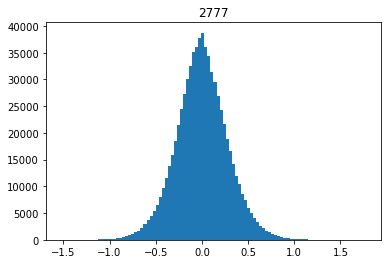

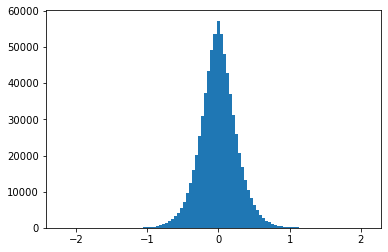

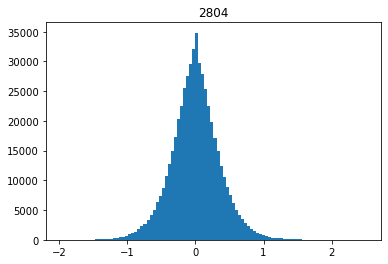

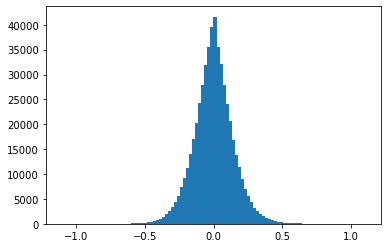

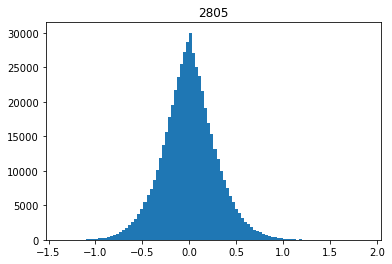

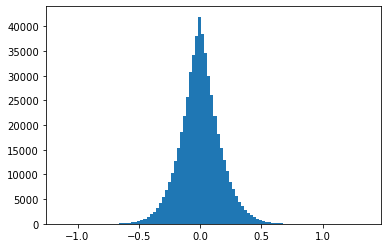

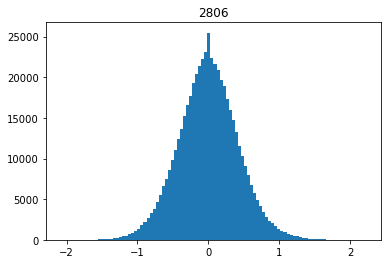

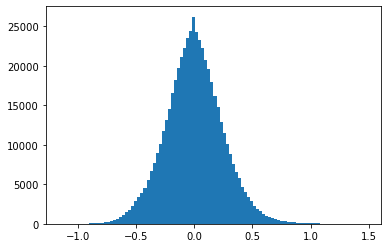

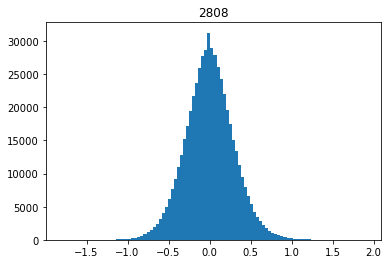

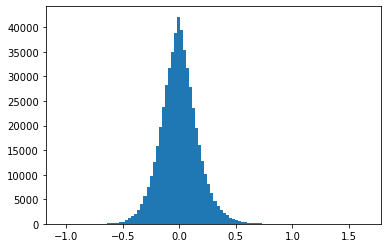

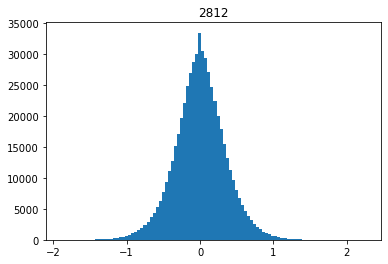

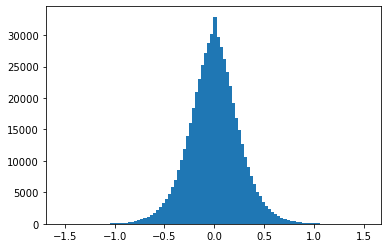

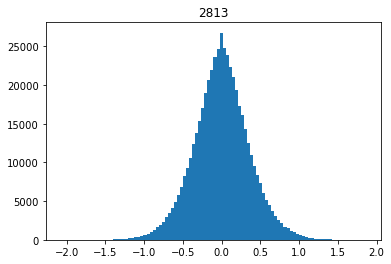

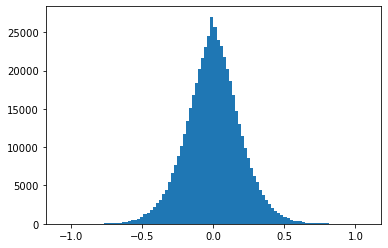

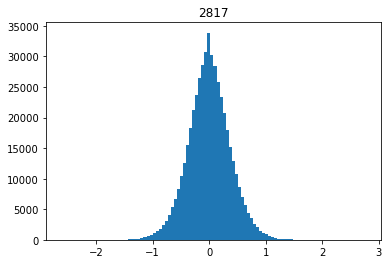

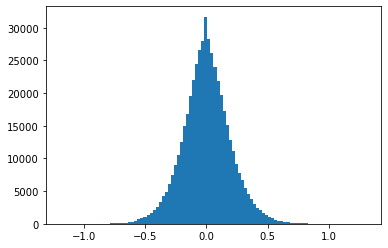

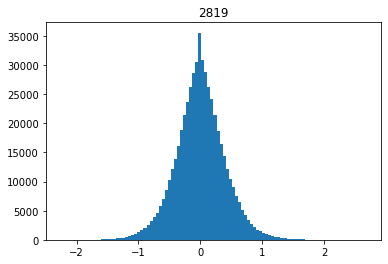

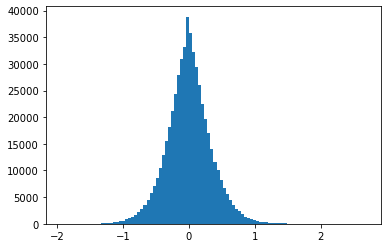

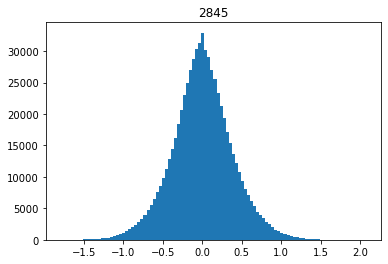

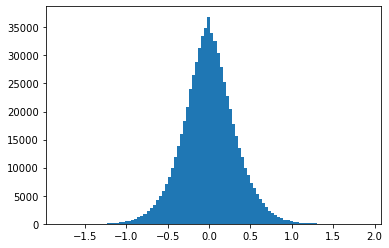

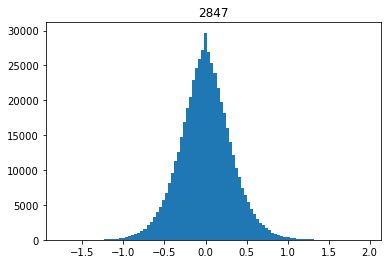

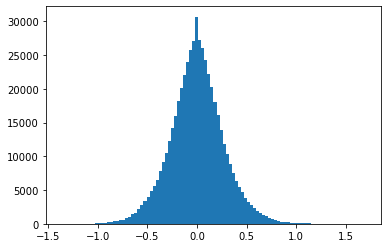

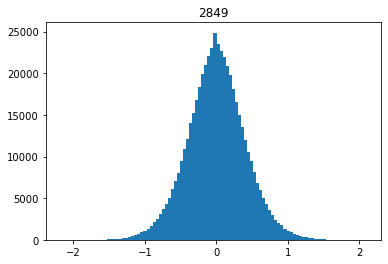

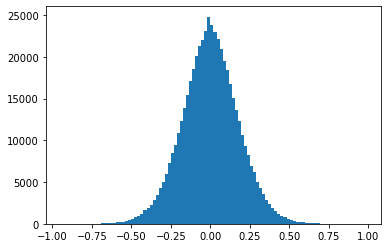

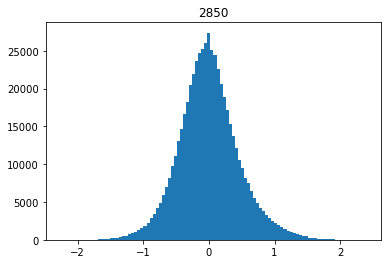

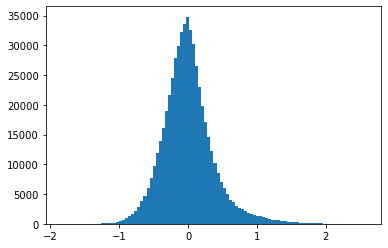

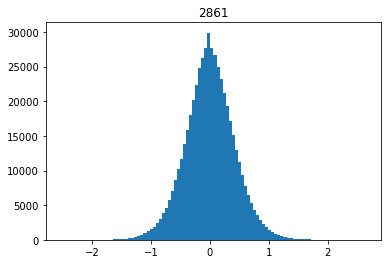

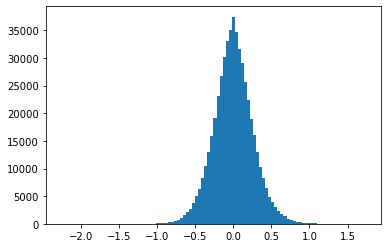

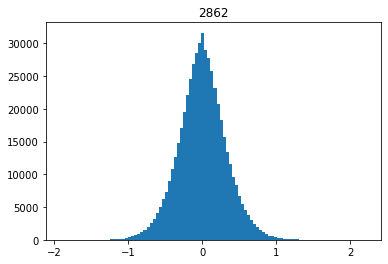

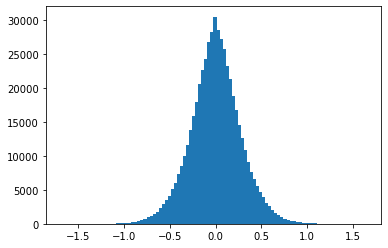

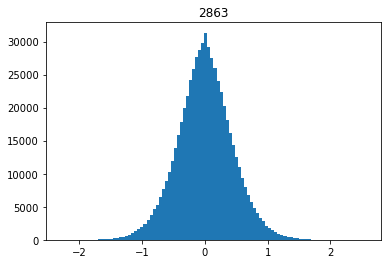

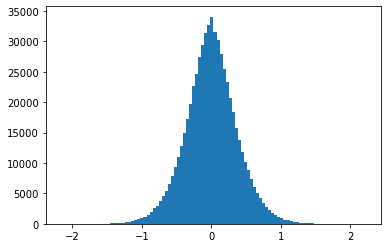

In [3]:
#Improved Spectral Gating
for i in range(1,3000):
    
    for j in ['Patra','Nikaia']:
        try:
            sr, mixtureR = wavfile.read('/home/myron/Desktop/Diplomatikh/data/F_Covid19/'+j+'_LR_st/'+str(i)+'_R_scaled')
            sr, mixtureL = wavfile.read('/home/myron/Desktop/Diplomatikh/data/F_Covid19/'+j+'_LR_st/'+str(i)+'_L_scaled')
            sr,s_R=wavfile.read('/home/myron/Desktop/Diplomatikh/data/F_Covid19/'+j+'_LR_dn/'+str(i)+'_R_denoised')
            sr,s_L=wavfile.read('/home/myron/Desktop/Diplomatikh/data/F_Covid19/'+j+'_LR_dn/'+str(i)+'_L_denoised')
            plt.title(str(i))
            plt.hist(mixtureR-s_R,100)
            plt.show()
            plt.hist(mixtureL-s_L,100)
            plt.show()
            
        except:
            continue

# Spectral Gating Experiments

In [ ]:
#Experiments with normal spectral gating

j='Patra'
i=43

sr, mixtureR1 = wavfile.read('/home/myron/Desktop/Diplomatikh/data/F_Covid19/'+j+'_LR_st/'+str(i)+'_R_scaled')
sr, mixtureL1 = wavfile.read('/home/myron/Desktop/Diplomatikh/data/F_Covid19/'+j+'_LR_st/'+str(i)+'_L_scaled')
s_R1=nr.reduce_noise(mixtureR1,sr)
s_L1=nr.reduce_noise(mixtureL1,sr)


wavfile.write(str(i)+'_R_denoised', sr, s_R1)
wavfile.write(str(i)+'_L_denoised', sr, s_L1)
wavfile.write(str(i)+'_L_noise', sr, mixtureL1-s_L1)


In [ ]:
j='Nikaia'
i=2457

sr, mixtureR2 = wavfile.read('/home/myron/Desktop/Diplomatikh/data/F_Covid19/'+j+'_LR_st/'+str(i)+'_R_scaled')
sr, mixtureL2 = wavfile.read('/home/myron/Desktop/Diplomatikh/data/F_Covid19/'+j+'_LR_st/'+str(i)+'_L_scaled')
s_R2=nr.reduce_noise(mixtureR2,sr)
s_L2=nr.reduce_noise(mixtureL2,sr)


wavfile.write(str(i)+'_R_denoised', sr, s_R2)
wavfile.write(str(i)+'_L_denoised', sr, s_L2)
wavfile.write(str(i)+'_L_noise', sr, mixtureL2-s_L2)

In [ ]:
#visualization of  normal spectral denoising
data=mixtureL1
out=s_L1
name='Patra:43'

gridsize = (3, 3)
fig = plt.figure(figsize=(20, 15))
fig.suptitle(name,fontsize=16)
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (0, 2))

ax4 = plt.subplot2grid(gridsize, (1, 0))
ax5 = plt.subplot2grid(gridsize, (1, 1))
ax6 = plt.subplot2grid(gridsize, (1, 2))


ax1.set_title('Noisy signal:')
ax1.plot(data)
ax2.set_title('Clean signal:')
ax2.plot(out)
ax3.set_title('Residual:')
ax3.plot((data-out))


ax4.specgram(data,NFFT=1024,Fs=48000,noverlap=512)
ax5.specgram(out,NFFT=1024,Fs=48000,noverlap=512)
ax6.specgram(data-out,NFFT=1024,Fs=48000,noverlap=512)
plt.show()

In [ ]:
data=mixtureL2
out=s_L2
name='Nikaia:2457'

gridsize = (3, 3)
fig = plt.figure(figsize=(20, 15))
fig.suptitle(name,fontsize=16)
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (0, 2))

ax4 = plt.subplot2grid(gridsize, (1, 0))
ax5 = plt.subplot2grid(gridsize, (1, 1))
ax6 = plt.subplot2grid(gridsize, (1, 2))


ax1.set_title('Noisy signal:')
ax1.plot(data)
ax2.set_title('Clean signal:')
ax2.plot(out)
ax3.set_title('Residual:')
ax3.plot((data-out))


ax4.specgram(data,NFFT=1024,Fs=48000,noverlap=512)
ax5.specgram(out,NFFT=1024,Fs=48000,noverlap=512)
ax6.specgram(data-out,NFFT=1024,Fs=48000,noverlap=512)
plt.show()

In [ ]:
#Noise distribution
noisePatra=mixtureL1-s_L1
noiseNikaia=mixtureL2-s_L2

fig, (ax5,ax6)= plt.subplots(2,1,constrained_layout = True)


ax5.title.set_text('Nikaia noise distribution:'+str(2457))
ax6.title.set_text('Patra noise distribution:'+str(43))


ax5.hist( noisePatra,bins=200)
ax6.hist( noiseNikaia,bins=200)
plt.show()

# Proposed Spectral Gating Experiments

In [ ]:
#Experiments with extented spectral gating

j='Patra'
i=43

sr, mixtureR1 = wavfile.read('/home/myron/Desktop/Diplomatikh/data/F_Covid19/'+j+'_LR_st/'+str(i)+'_R_scaled')
sr, mixtureL1 = wavfile.read('/home/myron/Desktop/Diplomatikh/data/F_Covid19/'+j+'_LR_st/'+str(i)+'_L_scaled')
s_R1,_=NoiseReduceExtented2(mixtureR1,sr)
s_L1,_=NoiseReduceExtented2(mixtureL1,sr)


wavfile.write(str(i)+'_R_denoised', sr, s_R1)
wavfile.write(str(i)+'_L_denoised', sr, s_L1)
wavfile.write(str(i)+'_L_noise', sr, mixtureL1-s_L1)
wavfile.write(str(i)+'_R_noise', sr, mixtureR1-s_R1)

In [ ]:
j='Nikaia'
i=2457

sr, mixtureR2 = wavfile.read('/home/myron/Desktop/Diplomatikh/data/F_Covid19/'+j+'_LR_st/'+str(i)+'_R_scaled')
sr, mixtureL2 = wavfile.read('/home/myron/Desktop/Diplomatikh/data/F_Covid19/'+j+'_LR_st/'+str(i)+'_L_scaled')
s_R2,_=NoiseReduceExtented(mixtureR2,sr)
s_L2,_=NoiseReduceExtented(mixtureL2,sr)


wavfile.write(str(i)+'_R_denoised', sr, s_R2)
wavfile.write(str(i)+'_L_denoised', sr, s_L2)
wavfile.write(str(i)+'_L_noise', sr, mixtureL2-s_L2)
wavfile.write(str(i)+'_R_noise', sr, mixtureR2-s_R2)

In [ ]:
#visualization of  extented spectral denoising
data=mixtureL1
out=s_L1
name='Patra:43'

gridsize = (3, 3)
fig = plt.figure(figsize=(20, 15))
fig.suptitle(name,fontsize=16)
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (0, 2))

ax4 = plt.subplot2grid(gridsize, (1, 0))
ax5 = plt.subplot2grid(gridsize, (1, 1))
ax6 = plt.subplot2grid(gridsize, (1, 2))


ax1.set_title('Noisy signal:')
ax1.plot(data)
ax2.set_title('Clean signal:')
ax2.plot(out)
ax3.set_title('Residual:')
ax3.plot((data-out))


ax4.specgram(data,NFFT=1024,Fs=48000,noverlap=512)
ax5.specgram(out,NFFT=1024,Fs=48000,noverlap=512)
ax6.specgram(data-out,NFFT=1024,Fs=48000,noverlap=512)
plt.show()

In [ ]:
data=mixtureL2
out=s_L2
name='Nikaia:2457'

gridsize = (3, 3)
fig = plt.figure(figsize=(20, 15))
fig.suptitle(name,fontsize=16)
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (0, 2))

ax4 = plt.subplot2grid(gridsize, (1, 0))
ax5 = plt.subplot2grid(gridsize, (1, 1))
ax6 = plt.subplot2grid(gridsize, (1, 2))


ax1.set_title('Noisy signal:')
ax1.plot(data)
ax2.set_title('Clean signal:')
ax2.plot(out)
ax3.set_title('Residual:')
ax3.plot((data-out))


ax4.specgram(data,NFFT=1024,Fs=48000,noverlap=512)
ax5.specgram(out,NFFT=1024,Fs=48000,noverlap=512)
ax6.specgram(data-out,NFFT=1024,Fs=48000,noverlap=512)
plt.show()

In [ ]:
#Noise distribution
noisePatra=mixtureL1-s_L1
noiseNikaia=mixtureL2-s_L2

fig, (ax5,ax6)= plt.subplots(2,1,constrained_layout = True)


ax5.title.set_text('Nikaia noise distribution:'+str(2457))
ax6.title.set_text('Patra noise distribution:'+str(43))


ax5.hist( noisePatra,bins=200)
ax6.hist( noiseNikaia,bins=200)
plt.show()

# Method weakness

In [ ]:
#Signals with powerfull noise.
j='Patra'
i=64


sr, mixtureR1 = wavfile.read('/home/myron/Desktop/Diplomatikh/data/F_Covid19/'+j+'_LR_st/'+str(i)+'_R_scaled')
sr, mixtureL1 = wavfile.read('/home/myron/Desktop/Diplomatikh/data/F_Covid19/'+j+'_LR_st/'+str(i)+'_L_scaled')

s_R3,_=NoiseReduceExtented(mixtureR1,sr)
s_L3,_=NoiseReduceExtented(mixtureL1,sr)


s_R4=nr.reduce_noise(mixtureR1,sr)
s_L4=nr.reduce_noise(mixtureL1,sr)


#visualization of denoising

data=mixtureL1
out=s_L4
name='Patra:64 Spectral Gating'

gridsize = (3, 3)
fig = plt.figure(figsize=(20, 15))
fig.suptitle(name,fontsize=16)
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (0, 2))

ax4 = plt.subplot2grid(gridsize, (1, 0))
ax5 = plt.subplot2grid(gridsize, (1, 1))
ax6 = plt.subplot2grid(gridsize, (1, 2))


ax1.set_title('Noisy signal:')
ax1.plot(data)
ax2.set_title('Clean signal:')
ax2.plot(out)
ax3.set_title('Residual:')
ax3.plot((data-out))


ax4.specgram(data,NFFT=1024,Fs=48000,noverlap=512)
ax5.specgram(out,NFFT=1024,Fs=48000,noverlap=512)
ax6.specgram(data-out,NFFT=1024,Fs=48000,noverlap=512)
plt.show()



#------------------------------------------------------------------------
data=mixtureL1
out=s_L3
name='Patra:64 Extented Spectral Gating'

gridsize = (3, 3)
fig = plt.figure(figsize=(20, 15))
fig.suptitle(name,fontsize=16)
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (0, 2))

ax4 = plt.subplot2grid(gridsize, (1, 0))
ax5 = plt.subplot2grid(gridsize, (1, 1))
ax6 = plt.subplot2grid(gridsize, (1, 2))


ax1.set_title('Noisy signal:')
ax1.plot(data)
ax2.set_title('Clean signal:')
ax2.plot(out)
ax3.set_title('Residual:')
ax3.plot((data-out))


ax4.specgram(data,NFFT=1024,Fs=48000,noverlap=512)
ax5.specgram(out,NFFT=1024,Fs=48000,noverlap=512)
ax6.specgram(data-out,NFFT=1024,Fs=48000,noverlap=512)
plt.show()
